# Telecom Churn Cast Study
___
```
Authors : Jithin Prakash K
          Subrahmanyan Vedula
```
___

# Problem Statement

## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

## Definitions of Churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

## High-value Churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## Data Preparation
The following data preparation steps are crucial for this problem:

 

1. Derive new features

  - This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

2. Filter high-value customers

  - As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
  - After filtering the high-value customers, you should get about 29.9k rows.

 

3. Tag churners and remove attributes of the churn phase

  - Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    - total_ic_mou_9

    - total_og_mou_9

    - vol_2g_mb_9

    - vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


## Modelling
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, recommend strategies to manage customer churn based on your observations.

 

**Note:** Everything has to be submitted in one Jupyter notebook.

# Solution and Approach

## Import Libraries

In [1]:
import pandas               as pd
import numpy                as np
import seaborn              as sns
import matplotlib.pyplot    as plt
import statsmodels.api      as sm 
 
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute                         import KNNImputer
from sklearn.model_selection                import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing                  import StandardScaler
from imblearn.over_sampling                 import SMOTE
from sklearn.linear_model                   import LogisticRegression
from sklearn.feature_selection              import RFE
from statsmodels.stats.outliers_influence   import variance_inflation_factor
from sklearn.metrics                        import confusion_matrix,accuracy_score,classification_report,roc_curve, f1_score
from sklearn.metrics                        import roc_auc_score,precision_score, recall_score,precision_recall_curve
from sklearn.decomposition                  import PCA,IncrementalPCA
from sklearn.ensemble                       import RandomForestClassifier,AdaBoostClassifier
from xgboost                                import XGBClassifier

## Read File

**For Anaconda**

**Load data from csv to pandas dataframe**

In [2]:
tel = pd.read_csv('telecom_churn_data.csv')

**For google colab**

**Mount google drive to read the files**

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

**Load data from csv to pandas dataframe**

In [4]:
# tel = pd.read_csv('/content/drive/MyDrive/Telecom_Case_Study/telecom_churn_data.csv')

**Changing the pandas option to display 500 rows and columns**

In [5]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

## Reading and Understanding the Data

**Head of the dataframe**

In [6]:
tel.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

**Shape of the dataframe**

In [7]:
tel.shape

(99999, 226)

**Info** - Data Types and null count

In [8]:
tel.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

**Describing all the columns**

In [9]:
tel.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

**Columns with unique values for all records**

In [10]:
tel.nunique()[tel.nunique()==tel.shape[0]]

mobile_number    99999
dtype: int64

In [11]:
tel.drop(columns='mobile_number',inplace=True)

## Data Preprocessing

### Missing Value Check 

**Missing data percentage in columns**

In [12]:
df_missing = tel.isnull().mean()[tel.isnull().mean()>0].reset_index().sort_values('index')
df_missing.columns = ['Features','Missing_Percentage']
df_missing['Missing_Percentage']=(df_missing['Missing_Percentage']*100).round(2)
df_missing.reset_index(inplace=True,drop=True)
df_missing

Features  Missing_Percentage
0                   arpu_2g_6               74.85
1                   arpu_2g_7               74.43
2                   arpu_2g_8               73.66
3                   arpu_2g_9               74.08
4                   arpu_3g_6               74.85
5                   arpu_3g_7               74.43
6                   arpu_3g_8               73.66
7                   arpu_3g_9               74.08
8          av_rech_amt_data_6               74.85
9          av_rech_amt_data_7               74.43
10         av_rech_amt_data_8               73.66
11         av_rech_amt_data_9               74.08
12            count_rech_2g_6               74.85
13            count_rech_2g_7               74.43
14            count_rech_2g_8               73.66
15            count_rech_2g_9               74.08
16            count_rech_3g_6               74.85
17            count_rech_3g_7               74.43
18            count_rech_3g_8               73.66
19            count_rech_3g_9               74.08
20        date_of_last_rech_6                1.61
21        date_of_last_rech_7                1.77
22        date_of_last_rech_8                3.62
23        date_of_last_rech_9                4.76
24   date_of_last_rech_data_6               74.85
25   date_of_last_rech_data_7               74.43
26   date_of_last_rech_data_8               73.66
27   date_of_last_rech_data_9               74.08
28                  fb_user_6               74.85
29                  fb_user_7               74.43
30                  fb_user_8               73.66
31                  fb_user_9               74.08
32                ic_others_6                3.94
33                ic_others_7                3.86
34                ic_others_8                5.38
35                ic_others_9                7.75
36               isd_ic_mou_6                3.94
37               isd_ic_mou_7                3.86
38               isd_ic_mou_8                5.38
39               isd_ic_mou_9                7.75
40               isd_og_mou_6                3.94
41               isd_og_mou_7                3.86
42               isd_og_mou_8                5.38
43               isd_og_mou_9                7.75
44       last_date_of_month_7                0.60
45       last_date_of_month_8                1.10
46       last_date_of_month_9                1.66
47               loc_ic_mou_6                3.94
48               loc_ic_mou_7                3.86
49               loc_ic_mou_8                5.38
50               loc_ic_mou_9                7.75
51           loc_ic_t2f_mou_6                3.94
52           loc_ic_t2f_mou_7                3.86
53           loc_ic_t2f_mou_8                5.38
54           loc_ic_t2f_mou_9                7.75
55           loc_ic_t2m_mou_6                3.94
56           loc_ic_t2m_mou_7                3.86
57           loc_ic_t2m_mou_8                5.38
58           loc_ic_t2m_mou_9                7.75
59             loc_ic_t2o_mou                1.02
60           loc_ic_t2t_mou_6                3.94
61           loc_ic_t2t_mou_7                3.86
62           loc_ic_t2t_mou_8                5.38
63           loc_ic_t2t_mou_9                7.75
64               loc_og_mou_6                3.94
65               loc_og_mou_7                3.86
66               loc_og_mou_8                5.38
67               loc_og_mou_9                7.75
68           loc_og_t2c_mou_6                3.94
69           loc_og_t2c_mou_7                3.86
70           loc_og_t2c_mou_8                5.38
71           loc_og_t2c_mou_9                7.75
72           loc_og_t2f_mou_6                3.94
73           loc_og_t2f_mou_7                3.86
74           loc_og_t2f_mou_8                5.38
75           loc_og_t2f_mou_9                7.75
76           loc_og_t2m_mou_6                3.94
77           loc_og_t2m_mou_7                3.86
78           loc_og_t2m_mou_8                5.38
79           loc_og_t

- There are some columns where the missing values are more than 70%

**Analyzing features with Missing values greater than 50%**

In [13]:
df_missing[df_missing.Missing_Percentage>50].reset_index(drop=True)

Features  Missing_Percentage
0                  arpu_2g_6               74.85
1                  arpu_2g_7               74.43
2                  arpu_2g_8               73.66
3                  arpu_2g_9               74.08
4                  arpu_3g_6               74.85
5                  arpu_3g_7               74.43
6                  arpu_3g_8               73.66
7                  arpu_3g_9               74.08
8         av_rech_amt_data_6               74.85
9         av_rech_amt_data_7               74.43
10        av_rech_amt_data_8               73.66
11        av_rech_amt_data_9               74.08
12           count_rech_2g_6               74.85
13           count_rech_2g_7               74.43
14           count_rech_2g_8               73.66
15           count_rech_2g_9               74.08
16           count_rech_3g_6               74.85
17           count_rech_3g_7               74.43
18           count_rech_3g_8               73.66
19           count_rech_3g_9               74.08
20  date_of_last_rech_data_6               74.85
21  date_of_last_rech_data_7               74.43
22  date_of_last_rech_data_8               73.66
23  date_of_last_rech_data_9               74.08
24                 fb_user_6               74.85
25                 fb_user_7               74.43
26                 fb_user_8               73.66
27                 fb_user_9               74.08
28           max_rech_data_6               74.85
29           max_rech_data_7               74.43
30           max_rech_data_8               73.66
31           max_rech_data_9               74.08
32          night_pck_user_6               74.85
33          night_pck_user_7               74.43
34          night_pck_user_8               73.66
35          night_pck_user_9               74.08
36         total_rech_data_6               74.85
37         total_rech_data_7               74.43
38         total_rech_data_8               73.66
39         total_rech_data_9               74.08

**Columns with more than 50% missing data**

In [14]:
missing_cols = list(df_missing[df_missing.Missing_Percentage>50]['Features'].values)
(missing_cols)

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9']

**Separating the missing columns month-wise**

In [15]:
missing_cols_6 = []
missing_cols_7 = []
missing_cols_8 = []
missing_cols_9 = []
for col in missing_cols:
    if '_6' in col : missing_cols_6.append(col)
    elif '_7' in col : missing_cols_7.append(col)
    elif '_8' in col : missing_cols_8.append(col)
    elif '_9' in col : missing_cols_9.append(col)

In [16]:
print('Total Missing Columns for 6th Month : ',len(missing_cols_6))
print('Total Missing Columns for 7th Month : ',len(missing_cols_7))
print('Total Missing Columns for 8th Month : ',len(missing_cols_8))
print('Total Missing Columns for 9th Month : ',len(missing_cols_9))
print('-'*45)
print('Total Missing Columns               : ',len(missing_cols))

Total Missing Columns for 6th Month :  10
Total Missing Columns for 7th Month :  10
Total Missing Columns for 8th Month :  10
Total Missing Columns for 9th Month :  10
---------------------------------------------
Total Missing Columns               :  40


**Analyzing meaningful missing**
___

***For month = 6***   
```Checking for all the columns missing for the month 6 when the count of recharge is null   - This can be counted as no recharges, i.e. all values to be 0```

In [17]:
tel[missing_cols_6][tel.count_rech_2g_6.isnull()].isnull().mean()*100

arpu_2g_6                   100.0
arpu_3g_6                   100.0
av_rech_amt_data_6          100.0
count_rech_2g_6             100.0
count_rech_3g_6             100.0
date_of_last_rech_data_6    100.0
fb_user_6                   100.0
max_rech_data_6             100.0
night_pck_user_6            100.0
total_rech_data_6           100.0
dtype: float64

***For month = 7***  
```Checking for all the columns missing for the month 7 when the count of recharge is null   - This can be counted as no recharges, i.e. all values to be 0```

In [18]:
tel[missing_cols_7][tel.count_rech_2g_7.isnull()].isnull().mean()*100

arpu_2g_7                   100.0
arpu_3g_7                   100.0
av_rech_amt_data_7          100.0
count_rech_2g_7             100.0
count_rech_3g_7             100.0
date_of_last_rech_data_7    100.0
fb_user_7                   100.0
max_rech_data_7             100.0
night_pck_user_7            100.0
total_rech_data_7           100.0
dtype: float64

***For month = 8***   
```Checking for all the columns missing for the month 8 when the count of recharge is null   - This can be counted as no recharges, i.e. all values to be 0```

In [19]:
tel[missing_cols_8][tel.count_rech_2g_8.isnull()].isnull().mean()*100

arpu_2g_8                   100.0
arpu_3g_8                   100.0
av_rech_amt_data_8          100.0
count_rech_2g_8             100.0
count_rech_3g_8             100.0
date_of_last_rech_data_8    100.0
fb_user_8                   100.0
max_rech_data_8             100.0
night_pck_user_8            100.0
total_rech_data_8           100.0
dtype: float64

***For month = 9***   
```Checking for all the columns missing for the month 9 when the count of recharge is null   - This can be counted as no recharges, i.e. all values to be 0```


In [20]:
tel[missing_cols_9][tel.count_rech_2g_9.isnull()].isnull().mean()*100

arpu_2g_9                   100.0
arpu_3g_9                   100.0
av_rech_amt_data_9          100.0
count_rech_2g_9             100.0
count_rech_3g_9             100.0
date_of_last_rech_data_9    100.0
fb_user_9                   100.0
max_rech_data_9             100.0
night_pck_user_9            100.0
total_rech_data_9           100.0
dtype: float64

- From the above analysis it is evident that all the values are missing when there are no recharges, this means the values are missing as the customers have not completely used the services. In this case, all the values can be imputed to 0 as per above analysis.

- When the number of recharges are 0 :,
  - arpu : Average revenue per user will be 0
  - av_rech_amt_data : Average Recharge Amount in local currency for Mobile internet will be 0
  - date_of_last_rech_data : Date of last recharge for mobile internet will be not available.
  - fb_user : Service scheme to avail services of Facebook and similar social networking sites will not be availed.
  - max_rech_data : Maximum recharge for Mobile internet will be 0.
  - night_pck_user : Night Pack for user would be 0.
  - total_rech_data : Total Recharge for mobile internet also would be 0.

**Imputing the values to 0 for meaningful missing**

Removing the object columns from imputing - Date columns

In [21]:
tel.loc[:,missing_cols].select_dtypes('object').columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [22]:
missing_cols=[col for col in missing_cols if not 'date_of_last_rech_data' in col]
print(missing_cols)

['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


***Imputing with 0 for meaningful missing***

In [23]:
tel.loc[:,missing_cols]=tel.loc[:,missing_cols].fillna(0)

**Missing values in columns after imputing**

In [24]:
df_missing = tel.isnull().mean()[tel.isnull().mean()>0].sort_values(0,ascending=False).reset_index()
df_missing.columns = ['Features','Missing_Percentage']
df_missing['Missing_Percentage']=(df_missing['Missing_Percentage']*100).round(2)
df_missing

Features  Missing_Percentage
0    date_of_last_rech_data_6               74.85
1    date_of_last_rech_data_7               74.43
2    date_of_last_rech_data_9               74.08
3    date_of_last_rech_data_8               73.66
4                loc_ic_mou_9                7.75
5            loc_og_t2f_mou_9                7.75
6            loc_og_t2c_mou_9                7.75
7            std_ic_t2o_mou_9                7.75
8            loc_ic_t2t_mou_9                7.75
9                loc_og_mou_9                7.75
10           std_ic_t2f_mou_9                7.75
11               isd_og_mou_9                7.75
12           std_og_t2t_mou_9                7.75
13               std_og_mou_9                7.75
14           std_og_t2m_mou_9                7.75
15           std_ic_t2m_mou_9                7.75
16           std_og_t2f_mou_9                7.75
17               std_ic_mou_9                7.75
18           loc_og_t2m_mou_9                7.75
19           std_ic_t2t_mou_9                7.75
20               spl_og_mou_9                7.75
21           loc_ic_t2m_mou_9                7.75
22                onnet_mou_9                7.75
23                og_others_9                7.75
24               offnet_mou_9                7.75
25                ic_others_9                7.75
26              roam_ic_mou_9                7.75
27               isd_ic_mou_9                7.75
28              roam_og_mou_9                7.75
29           loc_ic_t2f_mou_9                7.75
30           loc_og_t2t_mou_9                7.75
31               spl_ic_mou_9                7.75
32           std_og_t2c_mou_9                7.75
33               spl_og_mou_8                5.38
34                og_others_8                5.38
35               std_og_mou_8                5.38
36               loc_og_mou_8                5.38
37           std_og_t2c_mou_8                5.38
38           std_og_t2f_mou_8                5.38
39           std_og_t2m_mou_8                5.38
40           std_og_t2t_mou_8                5.38
41           loc_og_t2c_mou_8                5.38
42           loc_og_t2f_mou_8                5.38
43           loc_og_t2m_mou_8                5.38
44           loc_og_t2t_mou_8                5.38
45              roam_og_mou_8                5.38
46              roam_ic_mou_8                5.38
47               offnet_mou_8                5.38
48                onnet_mou_8                5.38
49           loc_ic_t2t_mou_8                5.38
50               isd_og_mou_8                5.38
51           std_ic_t2f_mou_8                5.38
52           loc_ic_t2m_mou_8                5.38
53               spl_ic_mou_8                5.38
54               std_ic_mou_8                5.38
55           std_ic_t2t_mou_8                5.38
56           loc_ic_t2f_mou_8                5.38
57               isd_ic_mou_8                5.38
58                ic_others_8                5.38
59           std_ic_t2o_mou_8                5.38
60           std_ic_t2m_mou_8                5.38
61               loc_ic_mou_8                5.38
62        date_of_last_rech_9                4.76
63           loc_ic_t2m_mou_6                3.94
64           std_ic_t2f_mou_6                3.94
65                ic_others_6                3.94
66           std_og_t2m_mou_6                3.94
67           std_og_t2t_mou_6                3.94
68           std_ic_t2o_mou_6                3.94
69           loc_og_t2t_mou_6                3.94
70               loc_og_mou_6                3.94
71               std_ic_mou_6                3.94
72               isd_ic_mou_6                3.94
73           loc_og_t2m_mou_6                3.94
74           loc_og_t2c_mou_6                3.94
75               spl_ic_mou_6                3.94
76           std_og_t2f_mou_6                3.94
77           std_og_t2c_mou_6                3.94
78               spl_og_mou_6                3.94
79              roam_

**Dropping columns with high missing percentage**

In [25]:
df_missing[df_missing.Missing_Percentage>50].reset_index(drop=True)

Features  Missing_Percentage
0  date_of_last_rech_data_6               74.85
1  date_of_last_rech_data_7               74.43
2  date_of_last_rech_data_9               74.08
3  date_of_last_rech_data_8               73.66

In [26]:
drop_cols = list(df_missing[df_missing.Missing_Percentage>50].Features)
drop_cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_9',
 'date_of_last_rech_data_8']

In [27]:
tel.drop(columns=drop_cols,inplace=True)

***Shape of the dataframe after dropping***

In [28]:
tel.shape

(99999, 221)

In [29]:
tel.describe()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count    99999.0         98981.0         98981.0         98981.0   
mean       109.0             0.0             0.0             0.0   
std          0.0             0.0             0.0             0.0   
min        109.0             0.0             0.0             0.0   
25%        109.0             0.0             0.0             0.0   
50%        109.0             0.0             0.0             0.0   
75%        109.0             0.0             0.0             0.0   
max        109.0             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000   
mean     282.987358    278.536648    279.154731    261.645069    132.395875   
std      328.439770    338.156291    344.474791    341.998630    297.207406   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      7.380000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
75%      371.060000    365.344500    369.370500    353.466500    118.740000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_

### Analyzing the object type data

**Analyzing the columns with Unique values less than 20**

In [30]:
tel.nunique()[tel.nunique()<20].sort_values()

circle_id                1
std_ic_t2o_mou_8         1
std_ic_t2o_mou_7         1
std_ic_t2o_mou_6         1
std_og_t2c_mou_9         1
std_og_t2c_mou_8         1
std_og_t2c_mou_7         1
std_og_t2c_mou_6         1
std_ic_t2o_mou_9         1
last_date_of_month_8     1
last_date_of_month_7     1
last_date_of_month_6     1
loc_ic_t2o_mou           1
std_og_t2o_mou           1
loc_og_t2o_mou           1
last_date_of_month_9     1
fb_user_7                2
fb_user_6                2
night_pck_user_9         2
fb_user_9                2
night_pck_user_7         2
night_pck_user_6         2
fb_user_8                2
night_pck_user_8         2
monthly_2g_9             5
monthly_2g_6             5
monthly_2g_7             6
monthly_2g_8             6
monthly_3g_9            11
monthly_3g_6            12
monthly_3g_8            12
monthly_3g_7            15
dtype: int64

**Analyzing Columns with only one  Unique value**

In [31]:
drop_cols = tel.nunique()[tel.nunique()==1].sort_index().index
drop_cols

Index(['circle_id', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'loc_ic_t2o_mou',
       'loc_og_t2o_mou', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9',
       'std_og_t2o_mou'],
      dtype='object')

In [32]:
for col in drop_cols:
    print(tel[col].value_counts(dropna=False),'\n')

109    99999
Name: circle_id, dtype: int64 

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64 

7/31/2014    99398
NaN            601
Name: last_date_of_month_7, dtype: int64 

8/31/2014    98899
NaN           1100
Name: last_date_of_month_8, dtype: int64 

9/30/2014    98340
NaN           1659
Name: last_date_of_month_9, dtype: int64 

0.0    98981
NaN     1018
Name: loc_ic_t2o_mou, dtype: int64 

0.0    98981
NaN     1018
Name: loc_og_t2o_mou, dtype: int64 

0.0    96062
NaN     3937
Name: std_ic_t2o_mou_6, dtype: int64 

0.0    96140
NaN     3859
Name: std_ic_t2o_mou_7, dtype: int64 

0.0    94621
NaN     5378
Name: std_ic_t2o_mou_8, dtype: int64 

0.0    92254
NaN     7745
Name: std_ic_t2o_mou_9, dtype: int64 

0.0    96062
NaN     3937
Name: std_og_t2c_mou_6, dtype: int64 

0.0    96140
NaN     3859
Name: std_og_t2c_mou_7, dtype: int64 

0.0    94621
NaN     5378
Name: std_og_t2c_mou_8, dtype: int64 

0.0    92254
NaN     7745
Name: std_og_t2c_mou_9, dtype: int64 

0.0 

**Dropping the columns with one unique value**  
These columns have low variance

In [33]:
tel.drop(drop_cols,axis=1,inplace=True)

print('Shape of Dataframe after dropping : ',tel.shape)

Shape of Dataframe after dropping :  (99999, 205)


**Object Columns**

In [34]:
object_cols = tel.select_dtypes('object').columns
object_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

In [35]:
tel[object_cols].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   
2           6/17/2014           7/24/2014           8/14/2014   
3           6/28/2014           7/31/2014           8/31/2014   
4           6/26/2014           7/28/2014            8/9/2014   

  date_of_last_rech_9  
0           9/28/2014  
1           9/30/2014  
2           9/29/2014  
3           9/30/2014  
4           9/28/2014

- It is noticed that all the object columns are date.

**Converting the format of the date columns**

In [36]:
for col in object_cols:
    tel[col]=pd.to_datetime(tel[col])

In [37]:
tel[object_cols].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0          2014-06-21          2014-07-16          2014-08-08   
1          2014-06-29          2014-07-31          2014-08-28   
2          2014-06-17          2014-07-24          2014-08-14   
3          2014-06-28          2014-07-31          2014-08-31   
4          2014-06-26          2014-07-28          2014-08-09   

  date_of_last_rech_9  
0          2014-09-28  
1          2014-09-30  
2          2014-09-29  
3          2014-09-30  
4          2014-09-28

In [38]:
tel.select_dtypes(['object','category']).columns

Index([], dtype='object')

- There are no more columns with object/categorical datatype

### Analyzing the Numeric type data

In [39]:
tel.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000   
mean     282.987358    278.536648    279.154731    261.645069    132.395875   
std      328.439770    338.156291    344.474791    341.998630    297.207406   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      7.380000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
75%      371.060000    365.344500    369.370500    353.466500    118.740000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.2400

- Describe function is used to analyze all the numeric data type features.

## Data Preparation

### Combining the Good Phase (6th and 7th Month) data

**Features that do not have _6 or _7 _8 or _9**

In [40]:
tel.columns[~(tel.columns.str.contains('_6') | tel.columns.str.contains('_7') | tel.columns.str.contains('_8') | tel.columns.str.contains('_9'))]

Index(['aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

**Converting the names of the columns ```'aug_vbc_3g'```, ```'jul_vbc_3g'```, ```'jun_vbc_3g'``` and ```'sep_vbc_3g'``` as per standards**

In [41]:
tel.rename(columns={"jun_vbc_3g": "vbc_3g_6",
                        "jul_vbc_3g": "vbc_3g_7",
                        "aug_vbc_3g": "vbc_3g_8",
                        "sep_vbc_3g": "vbc_3g_9"},inplace=True)

**Obtaining recharge details for 6th and 7th Month**

In [42]:
cols = tel.columns[tel.columns.str.contains('rech') & (tel.columns.str.contains('_6') | tel.columns.str.contains('_7'))]
cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6',
       'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'total_rech_data_6',
       'total_rech_data_7', 'max_rech_data_6', 'max_rech_data_7',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_3g_6',
       'count_rech_3g_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7'],
      dtype='object')

**Head of the recharge details of 6th and 7th month**

In [43]:
tel[cols].head()

total_rech_num_6  total_rech_num_7  total_rech_amt_6  total_rech_amt_7  \
0                 4                 3               362               252   
1                 4                 9                74               384   
2                 5                 4               168               315   
3                10                11               230               310   
4                 5                 6               196               350   

   max_rech_amt_6  max_rech_amt_7 date_of_last_rech_6 date_of_last_rech_7  \
0             252             252          2014-06-21          2014-07-16   
1              44             154          2014-06-29          2014-07-31   
2              86             200          2014-06-17          2014-07-24   
3              60              50          2014-06-28          2014-07-31   
4              56             110          2014-06-26          2014-07-28   

   total_rech_data_6  total_rech_data_7  max_rech_data_6  max_rech_data_7  \
0                1.0                1.0            252.0            252.0   
1                0.0                1.0              0.0            154.0   
2                0.0                0.0              0.0              0.0   
3                0.0                0.0              0.0              0.0   
4                1.0                0.0             56.0              0.0   

   count_rech_2g_6  count_rech_2g_7  count_rech_3g_6  count_rech_3g_7  \
0              0.0              0.0              1.0              1.0   
1              0.0              1.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              1.0              0.0              0.0              0.0   

   av_rech_amt_data_6  av_rech_amt_data_7  
0               252.0               252.0  
1                 0.0               154.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                56.0                 0.0

In [44]:
tel[['total_rech_amt_6','av_rech_amt_data_6',
     'total_rech_amt_7','av_rech_amt_data_7',
     'total_rech_amt_8','av_rech_amt_data_8']].head()

total_rech_amt_6  av_rech_amt_data_6  total_rech_amt_7  av_rech_amt_data_7  \
0               362               252.0               252               252.0   
1                74                 0.0               384               154.0   
2               168                 0.0               315                 0.0   
3               230                 0.0               310                 0.0   
4               196                56.0               350                 0.0   

   total_rech_amt_8  av_rech_amt_data_8  
0               252               252.0  
1               283                50.0  
2               116                 0.0  
3               601                 0.0  
4               287                 0.0

- From the above table it is noticed that the Total Recharge Amount by the customer is the sum of the recharge amount for data and the calls. The data recharge amount can be obtained by multiplying the number of recharge with the average data recharge.

**Obtaining Average recharge amount for 6th and 7th Month**

In [45]:
tel['avg_rech_amt_data_6_and_7'] = 0.5*(tel['total_rech_amt_6']+tel['total_rech_amt_7']+
                                        (tel['av_rech_amt_data_6']*tel['total_rech_data_6'])+
                                        (tel['av_rech_amt_data_7']*tel['total_rech_data_7'])
                                       )

In [46]:
cols = ['avg_rech_amt_data_6_and_7']
tel[cols].head()

avg_rech_amt_data_6_and_7
0                      559.0
1                      306.0
2                      241.5
3                      270.0
4                      301.0

#### **Obtaining high value customers**

High value customers are those customers who contribute to the company the highest in terms of the recharge value. We are considering the average pay of 6th and 7th month and considering 70th percentile of the recharge amount

In [47]:
hvc_value = tel['avg_rech_amt_data_6_and_7'].quantile(70/100)
hvc_value

478.0

**Obtaining data only for high value customers for further usage**

In [48]:
df_hvc = tel[tel.avg_rech_amt_data_6_and_7>hvc_value]
print('Shape of the original dataframe : ',tel.shape)
print('Shape of the dataframe after high value customer filter : ',df_hvc.shape)

Shape of the original dataframe :  (99999, 206)
Shape of the dataframe after high value customer filter :  (29953, 206)


### Missing Value imputation

**Missing value percentage**

In [49]:
100*df_hvc.isnull().mean()[df_hvc.isnull().mean()>0].sort_values(ascending=False)

isd_og_mou_9           6.336594
loc_og_t2t_mou_9       6.336594
loc_og_t2m_mou_9       6.336594
std_ic_t2m_mou_9       6.336594
std_ic_t2t_mou_9       6.336594
loc_og_t2c_mou_9       6.336594
loc_ic_mou_9           6.336594
loc_og_mou_9           6.336594
loc_ic_t2f_mou_9       6.336594
std_og_t2t_mou_9       6.336594
loc_ic_t2m_mou_9       6.336594
std_og_t2m_mou_9       6.336594
loc_ic_t2t_mou_9       6.336594
std_og_t2f_mou_9       6.336594
og_others_9            6.336594
std_og_mou_9           6.336594
spl_og_mou_9           6.336594
std_ic_t2f_mou_9       6.336594
loc_og_t2f_mou_9       6.336594
isd_ic_mou_9           6.336594
onnet_mou_9            6.336594
std_ic_mou_9           6.336594
roam_og_mou_9          6.336594
roam_ic_mou_9          6.336594
ic_others_9            6.336594
offnet_mou_9           6.336594
spl_ic_mou_9           6.336594
offnet_mou_8           3.912797
loc_ic_t2m_mou_8       3.912797
std_og_t2m_mou_8       3.912797
loc_og_t2t_mou_8       3.912797
loc_ic_t

-  It is observed that the missing values of the columns are within 7% limit and can be imputed using KNNImputer 

**Datetime Columns**

In [50]:
dt_cols = df_hvc.select_dtypes('datetime64').columns
dt_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

**Drop date columns**

In [51]:
df_hvc.drop(columns=dt_cols,inplace=True)

##### **Missing Value imputation  using KNN Imputer**

In [52]:
knn_imputer = KNNImputer(n_neighbors=5)
tel_knn = knn_imputer.fit_transform(df_hvc)
tel_knn = pd.DataFrame(tel_knn,columns=df_hvc.columns)
tel_knn.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0   197.385   214.816   213.803   21.100        1.764         8.50   
1  1069.180  1349.850  3171.480  500.000       57.840        54.68   
2   378.721   492.223   137.362  166.787      413.690       351.03   
3   514.453   597.753   637.760  578.596      102.410       132.11   
4    74.350   193.897   366.966  811.480       48.960        50.66   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00        4.074         23.72        45.802          0.00   
1        52.29       54.808        453.43       567.160        325.91   
2        35.08       33.460         94.66        80.630        136.48   
3        85.14      161.630        757.93       896.680        983.39   
4        33.58       15.740         85.41        89.360        205.89   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0        23.864         17.852         11.322           0.00          7.054   
1       239.656         16.230         33.490          31.64         65.090   
2       108.710          0.000          0.000           0.00          0.000   
3       869.890          0.000          0.000           0.00          0.000   
4       111.880          0.000          0.000           0.00          0.000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0         15.176          8.928           0.00         17.948   
1         23.740         12.590          38.06         75.320   
2          0.000          0.000           0.00          0.000   
3          0.000          0.000           0.00          0.000   
4          0.000          0.000           0.00          0.000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0             1.658             1.958              0.00             2.702   
1            51.390            31.380             40.28            25.802   
2           297.130           217.590             12.49            26.130   
3             4.480             6.160             23.34            29.980   
4            48.960            50.660             33.58            15.740   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0             8.652            19.696              0.00             2.824   
1           308.630           447.380            162.28           105.478   
2            80.960            70.580             50.54            34.580   
3            91.810            87.930            104.81           107.540   
4            82.940            83.010            148.56            83.730   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00             3.688              0.00             0.016   
1             62.13            55.140             53.23            12.240   
2              0.00             0.000              0.00             0.000   
3              0.75             0.000              1.58             0.000   
4              0.00             0.000              0.00             2.450   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0               0.0              0.00             0.000   
1               0.0               0.0              0.00             1.162   
2               0.0               0.0              7.15             0.000   
3               0.0               0.0              0.00             0.000   
4               0.0               0.0             17.71             4.080   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0        10.314        25.344          0.00         5.544              0.00   
1       422.160       533.910        255.79       143.528              4.30   
2       378.090       288.180         63.04        60.710            116.56   
3        97.040        94.090        129.74       137.530             97.93   
4       131.910       133.680   

In [53]:
tel_knn.isnull().mean()[tel_knn.isnull().mean()>0]

Series([], dtype: float64)

### Generating Churn Labels - The Target Variable

**Tag churners and remove attributes of the churn phase**

**Tagging Churners** 
Churned customers are those who have not made and incoming/outgoing calls or have not used any data

In [54]:
tel_knn[['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

total_ic_mou_9  total_og_mou_9   vol_2g_mb_9   vol_3g_mb_9
count    29953.000000    29953.000000  29953.000000  29953.000000
mean       265.079232      501.141639     91.405987    349.915812
std        358.502996      667.138160    282.104414    947.700826
min          0.000000        0.000000      0.000000      0.000000
25%         50.490000       47.730000      0.000000      0.000000
50%        158.030000      285.130000      0.000000      0.000000
75%        343.960000      698.790000     38.020000    321.570000
max       7785.730000    11517.730000   8993.950000  39221.270000

In [55]:
tel_knn['churn'] = 0
tel_knn.loc[ (tel_knn.total_ic_mou_9 == 0) & (tel_knn.total_og_mou_9 == 0) & 
            (tel_knn.vol_2g_mb_9 ==0) & (tel_knn.vol_3g_mb_9 ==0),'churn']=1

In [56]:
tel_knn['churn'].value_counts(normalize=True)*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

In [57]:
tel_knn['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

of 29953 high value customers, 2433 are such 
  - who did not receive any incoming calls
  - who did not made any outgoing calls
  - with no data usage.

- **The churn rate is 8.1%**

**Removing attributes of the churn phase (Month  9)**

In [58]:
churn_phase_cols = tel_knn.columns[tel_knn.columns.str.contains('_9')]
churn_phase_cols

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'vbc_3g_9'],
      dtype='object')

In [59]:
print('Shape of Dataframe before dropping : ',tel_knn.shape)
tel_knn.drop(churn_phase_cols, axis = 1, inplace = True)
print('Shape of Dataframe after dropping  : ',tel_knn.shape)

Shape of Dataframe before dropping :  (29953, 203)
Shape of Dataframe after dropping  :  (29953, 153)


## Feature Engineering

**Features with categories less than 5**

In [60]:
tel_knn.nunique()[tel_knn.nunique()<5]

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
churn               2
dtype: int64

In [61]:
cols = tel_knn.nunique()[tel_knn.nunique()<5].index
for col in cols:
    print(tel_knn[col].value_counts())

0.0    29546
1.0      407
Name: night_pck_user_6, dtype: int64
0.0    29578
1.0      375
Name: night_pck_user_7, dtype: int64
0.0    29612
1.0      341
Name: night_pck_user_8, dtype: int64
1.0    15511
0.0    14442
Name: fb_user_6, dtype: int64
1.0    15705
0.0    14248
Name: fb_user_7, dtype: int64
0.0    15656
1.0    14297
Name: fb_user_8, dtype: int64
0    27520
1     2433
Name: churn, dtype: int64


**Deriving 'Good Phase' and 'Action Phase'**  


***Good Phase*** : *This is achieved by combining initial 2 months (June and July) and taking the average value for the features.*


***Action Phase*** : *This is august month data.*

In [62]:
tel_knn.columns[tel_knn.columns.str.contains('_6')]

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6',
       'sachet_3g_6', 'fb_user_6', 'vbc_3g_6', 'avg_rech_amt_data_6_an

In [63]:
tel_knn.drop(columns='avg_rech_amt_data_6_and_7',inplace=True)

In [64]:
cols = tel_knn.columns[tel_knn.columns.str.contains('_6')]
cols = [col[:-2] for col in cols]
print(cols)

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'vbc_3g']


In [65]:
for col in cols:
    tel_knn[col+'_good_phase'] = (tel_knn[col+'_6']+tel_knn[col+'_7'])/2
    tel_knn[col+'_action_phase'] = tel_knn[col+'_8']

In [66]:
print('Shape of Dataframe before dropping : ',tel_knn.shape)
tel_knn.drop([col+'_6' for col in cols]+
             [col+'_7' for col in cols]+
             [col+'_8' for col in cols], axis = 1, inplace = True)
print('Shape of Dataframe after dropping  : ',tel_knn.shape)

Shape of Dataframe before dropping :  (29953, 252)
Shape of Dataframe after dropping  :  (29953, 102)


In [67]:
tel_knn.columns[tel_knn.columns.str.contains('good_phase')]

Index(['arpu_good_phase', 'onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'loc_og_t2t_mou_good_phase', 'loc_og_t2m_mou_good_phase',
       'loc_og_t2f_mou_good_phase', 'loc_og_t2c_mou_good_phase',
       'loc_og_mou_good_phase', 'std_og_t2t_mou_good_phase',
       'std_og_t2m_mou_good_phase', 'std_og_t2f_mou_good_phase',
       'std_og_mou_good_phase', 'isd_og_mou_good_phase',
       'spl_og_mou_good_phase', 'og_others_good_phase',
       'total_og_mou_good_phase', 'loc_ic_t2t_mou_good_phase',
       'loc_ic_t2m_mou_good_phase', 'loc_ic_t2f_mou_good_phase',
       'loc_ic_mou_good_phase', 'std_ic_t2t_mou_good_phase',
       'std_ic_t2m_mou_good_phase', 'std_ic_t2f_mou_good_phase',
       'std_ic_mou_good_phase', 'total_ic_mou_good_phase',
       'spl_ic_mou_good_phase', 'isd_ic_mou_good_phase',
       'ic_others_good_phase', 'total_rech_num_good_phase',
       'total_rech_amt_good_phase', 'max_rech_amt_good_phase',
    

**Deriving features as a delta reduction on the usage**

In [68]:
cols  = ['arpu_','roam_ic_mou_','roam_og_mou_','loc_og_mou_','std_og_mou_','isd_og_mou_','spl_og_mou_','og_others_',
'total_og_mou_','loc_ic_mou_','std_ic_mou_','total_ic_mou_','spl_ic_mou_','isd_ic_mou_','ic_others_',
'total_rech_amt_','av_rech_amt_data_','vol_2g_mb_','vol_3g_mb_','arpu_3g_','arpu_2g_','vbc_3g_']
len(cols)

22

In [69]:
for col in cols:
    tel_knn['deltadiff_'+col[:-1]] = tel_knn[col+'action_phase']-tel_knn[col+'good_phase']

In [70]:
tel_knn.shape

(29953, 124)

## Visualizing Data

In [71]:
tel_knn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 124 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   aon                            float64
 1   churn                          int64  
 2   arpu_good_phase                float64
 3   arpu_action_phase              float64
 4   onnet_mou_good_phase           float64
 5   onnet_mou_action_phase         float64
 6   offnet_mou_good_phase          float64
 7   offnet_mou_action_phase        float64
 8   roam_ic_mou_good_phase         float64
 9   roam_ic_mou_action_phase       float64
 10  roam_og_mou_good_phase         float64
 11  roam_og_mou_action_phase       float64
 12  loc_og_t2t_mou_good_phase      float64
 13  loc_og_t2t_mou_action_phase    float64
 14  loc_og_t2m_mou_good_phase      float64
 15  loc_og_t2m_mou_action_phase    float64
 16  loc_og_t2f_mou_good_phase      float64
 17  loc_og_t2f_mou_action_phase    float64
 18  loc_o

In [72]:
tel_knn.describe()

aon         churn  arpu_good_phase  arpu_action_phase  \
count  29953.000000  29953.000000     29953.000000       29953.000000   
mean    1209.280573      0.081227       559.990303         508.890301   
std      957.449442      0.273188       430.142954         502.136278   
min      180.000000      0.000000      -749.783000        -945.808000   
25%      460.000000      0.000000       345.498000         231.615000   
50%      846.000000      0.000000       485.312500         427.604000   
75%     1756.000000      0.000000       674.950500         661.753000   
max     4321.000000      1.000000     31438.461000       33543.624000   

       onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
count          29953.000000            29953.000000           29953.000000   
mean             265.106856              235.300115             377.258314   
std              440.666238              458.388518             457.548805   
min                0.000000                0.000000               0.000000   
25%               21.395000               12.640000              84.695000   
50%               92.480000               66.730000             236.275000   
75%              307.810000              241.060000             499.285000   
max             7331.060000            10752.560000            8314.795000   

       offnet_mou_action_phase  roam_ic_mou_good_phase  \
count             29953.000000            29953.000000   
mean                337.000982               14.559978   
std                 480.936238               66.286025   
min                   0.000000                0.000000   
25%                  51.490000                0.000000   
50%                 183.780000                0.000000   
75%                 438.940000                1.855000   
max               14007.340000             3060.600000   

       roam_ic_mou_action_phase  roam_og_mou_good_phase  \
count              29953.000000            29953.000000   
mean                  12.781725               23.619499   
std                   74.259030               93.561311   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                0.000000   
75%                    0.000000                3.715000   
max                 4169.810000             2410.835000   

       roam_og_mou_action_phase  loc_og_t2t_mou_good_phase  \
count              29953.000000               29953.000000   
mean                  20.235109                  85.367572   
std                  104.838392                 222.428136   
min                    0.000000                   0.000000   
25%                    0.000000                   6.885000   
50%                    0.000000                  26.900000   
75%                    0.000000                  79.630000   
max                 5337.040000                5941.565000   

       loc_og_t2t_mou_action_phase  loc_og_t2m_mou_good_phase  \
count                 29953.000000               29953.000000   
mean                     78.560418                 163.770863   
std                     227.507657                 232.125713   
min                       0.000000                   0.000000   
25%                       3.480000                  25.600000   
50%                      21.280000                  83.115000   
75%                      72.310000                 211.525000   
max                   10752.560000                4150.165000   

       loc_og_t2m_mou_action_phase  loc_og_t2f_mou_good_phase  \
count                 29953.000000               29953.000000   
mean                    152.749707                   6.417934   
std                     233.308272                  20.970095   
min                       0.000000                   0.000000   
25%                      15.660000                   0.000000   
50%                      68.840000                   0.690000   


### Box Plots of numerical data

After observing above describe values, lets plot box plots for months 6,7,8 of variables ```onnet, offnet, total outgoing, total recharge amount and aon(age on network)```

In [73]:
# Function to print the 95th Percentile data for action and good phase
def boxplot_churn(col):
    plt.figure(figsize=(8,6))
    plt.subplot(1,2,1)
    sns.boxplot(data=tel_knn[tel_knn[col+'_good_phase']<tel_knn[col+'_good_phase'].quantile(.95)], y=col+'_good_phase',x="churn")
    plt.subplot(1,2,2)
    sns.boxplot(data=tel_knn[tel_knn[col+'_action_phase']<tel_knn[col+'_action_phase'].quantile(.95)], y=col+'_action_phase',x="churn")
    plt.tight_layout()
    plt.show()

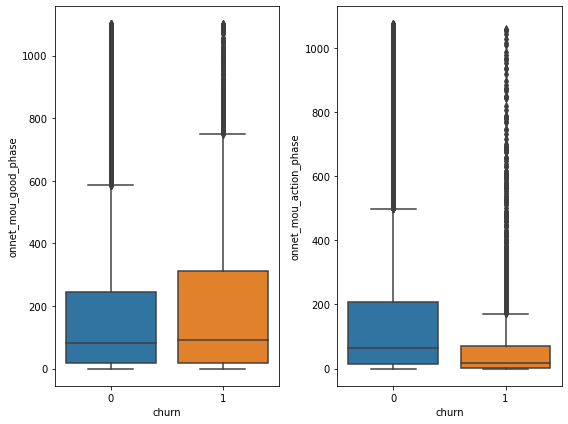

In [74]:
boxplot_churn("onnet_mou")

**Inference**  
- onnet : outside calls within same operator network made by churned customers were relatively higher vis-a-vis non-churn customers during good phase
- onnet : outside calls within same operator network made by churned customers were significantly dropped vis-a-vis non-churn customers during action phase

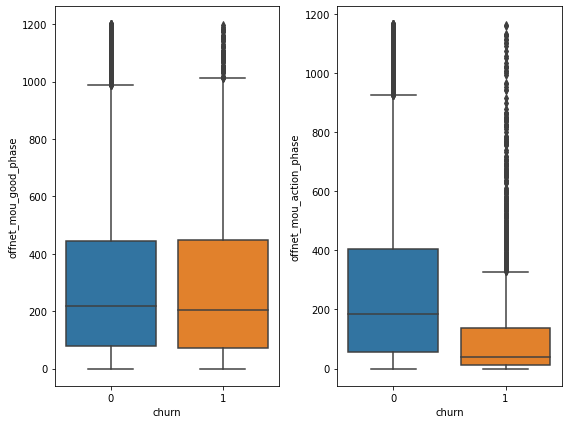

In [75]:
boxplot_churn("offnet_mou")

**Inference**  
- offnet : outside calls to other operator network made by churned customers were relatively higher vis-a-vis non-churn customers during good phase
- offnet : outside calls to other operator network made by churned customers were significantly dropped vis-a-vis non-churn customers during action phase

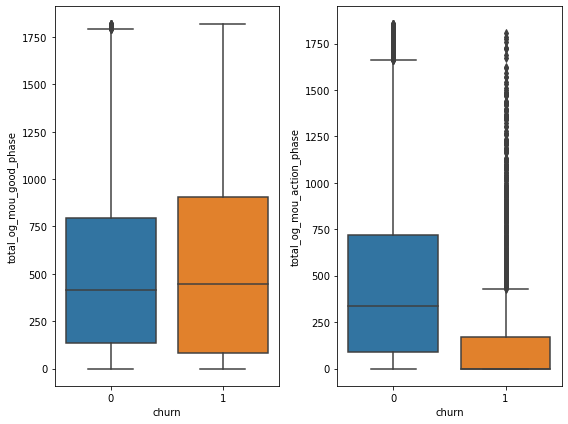

In [76]:
boxplot_churn("total_og_mou")

**Inference**  
- total_og : total outgoing calls made by churned customers were relatively higher vis-a-vis non-churn customers during good phase
- total_og : total outgoing calls made by churned customers were significantly dropped vis-a-vis non-churn customers during action phase

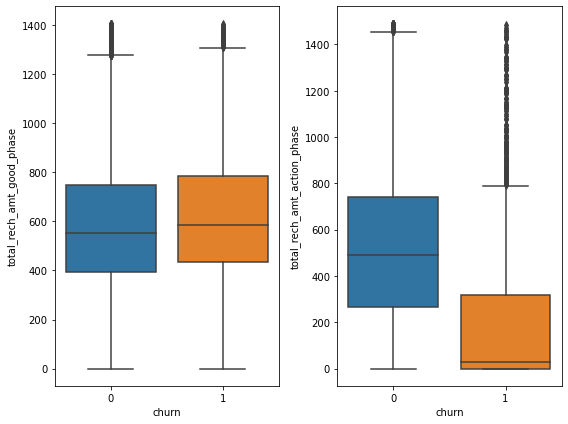

In [77]:
boxplot_churn("total_rech_amt")

**Inference**  
- total_rech_amt : total recharge amount by churned customers were bit higher vis-a-vis non-churn customers during good phase
- total_rech_amt :  total recharge amount by churned  customers were significantly dropped below the 25th percentile of non-churn customers during action phase

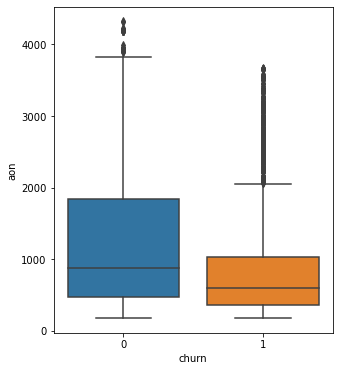

In [78]:
plt.figure(figsize=(5,6))
sns.boxplot(data=tel_knn, y="aon",x="churn")
plt.show()

In [79]:
df_1 = tel_knn[tel_knn['churn']==1]
df_0 = tel_knn[tel_knn['churn']==0]

In [80]:
df_1['aon'].describe()

count    2433.000000
mean      860.643650
std       746.711696
min       180.000000
25%       356.000000
50%       602.000000
75%      1035.000000
max      3670.000000
Name: aon, dtype: float64

In [81]:
df_0['aon'].describe()

count    27520.000000
mean      1240.103016
std        967.876425
min        180.000000
25%        471.000000
50%        880.000000
75%       1839.000000
max       4321.000000
Name: aon, dtype: float64

**Inference**

 - aon (age on network) :  median age on network of non-churned customers is 880 days, however the median age on network on churned customers is around 602 days.

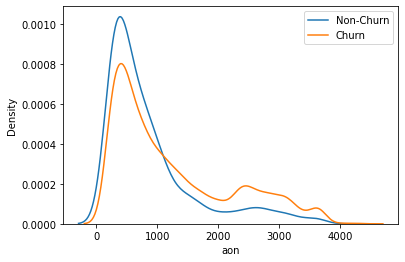

In [82]:
sns.distplot(df_1['aon'], label = 'Non-Churn',hist=False)
sns.distplot(df_0['aon'], label = 'Churn',hist=False)
plt.legend()
plt.show()

### Count plot for categorical data

Features with categories less than 5 , let's analyze and see if we can derive any insights from these variables

In [83]:
tel_knn.nunique()[tel_knn.nunique()<5]

churn                          2
night_pck_user_good_phase      3
night_pck_user_action_phase    2
fb_user_good_phase             3
fb_user_action_phase           2
dtype: int64

In [84]:
# Function to print the countplot
def countplot_churn(col):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.countplot( x = col+'_good_phase', hue = 'churn', data = tel_knn)
    plt.subplot(1,2,2)
    sns.countplot( x = col+'_action_phase', hue = 'churn', data = tel_knn)
    plt.tight_layout()
    plt.show()

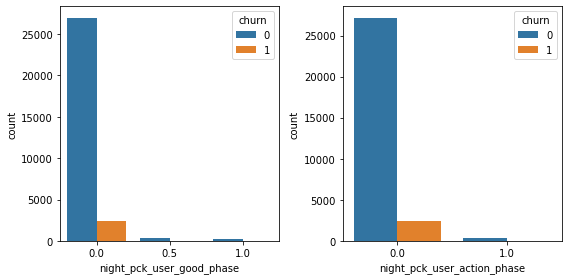

In [85]:
countplot_churn('night_pck_user')

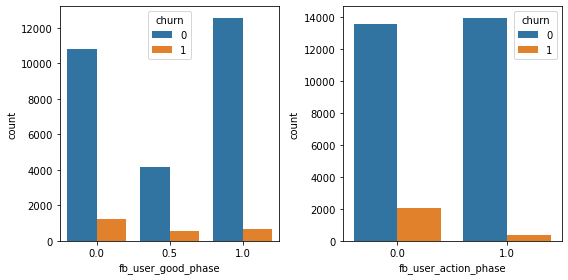

In [86]:
countplot_churn('fb_user')

- We see the data as 0.5 since we took the average of the 2 months.  We can round it to 1 for these cases

In [87]:
tel_knn.loc[tel_knn.night_pck_user_good_phase==0.5,'night_pck_user_good_phase']=1
tel_knn.loc[tel_knn.fb_user_good_phase==0.5,'fb_user_good_phase']=1

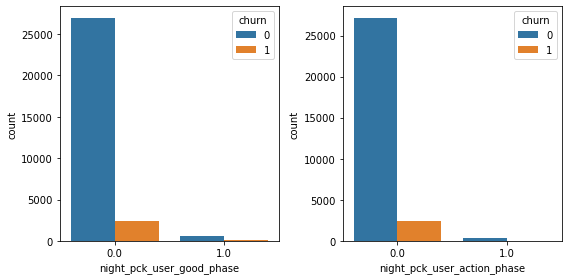

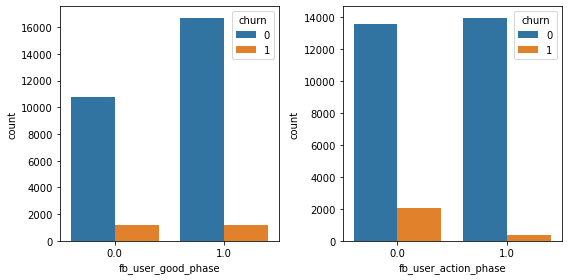

In [88]:
countplot_churn('night_pck_user')
countplot_churn('fb_user')

**Inference**
- Night pack doesnt show much difference in action and good phase, the churners are low in number and the trend is also similar
- For fb user , the good phase has relatively higher churned users compared to action phase

**Creating dataframes of columns belonging to each phase**

In [89]:
good_columns = tel_knn.columns[tel_knn.columns.str.contains('_good_phase')]
action_columns = tel_knn.columns[tel_knn.columns.str.contains('_action_phase')]

### Heatmap of correlations

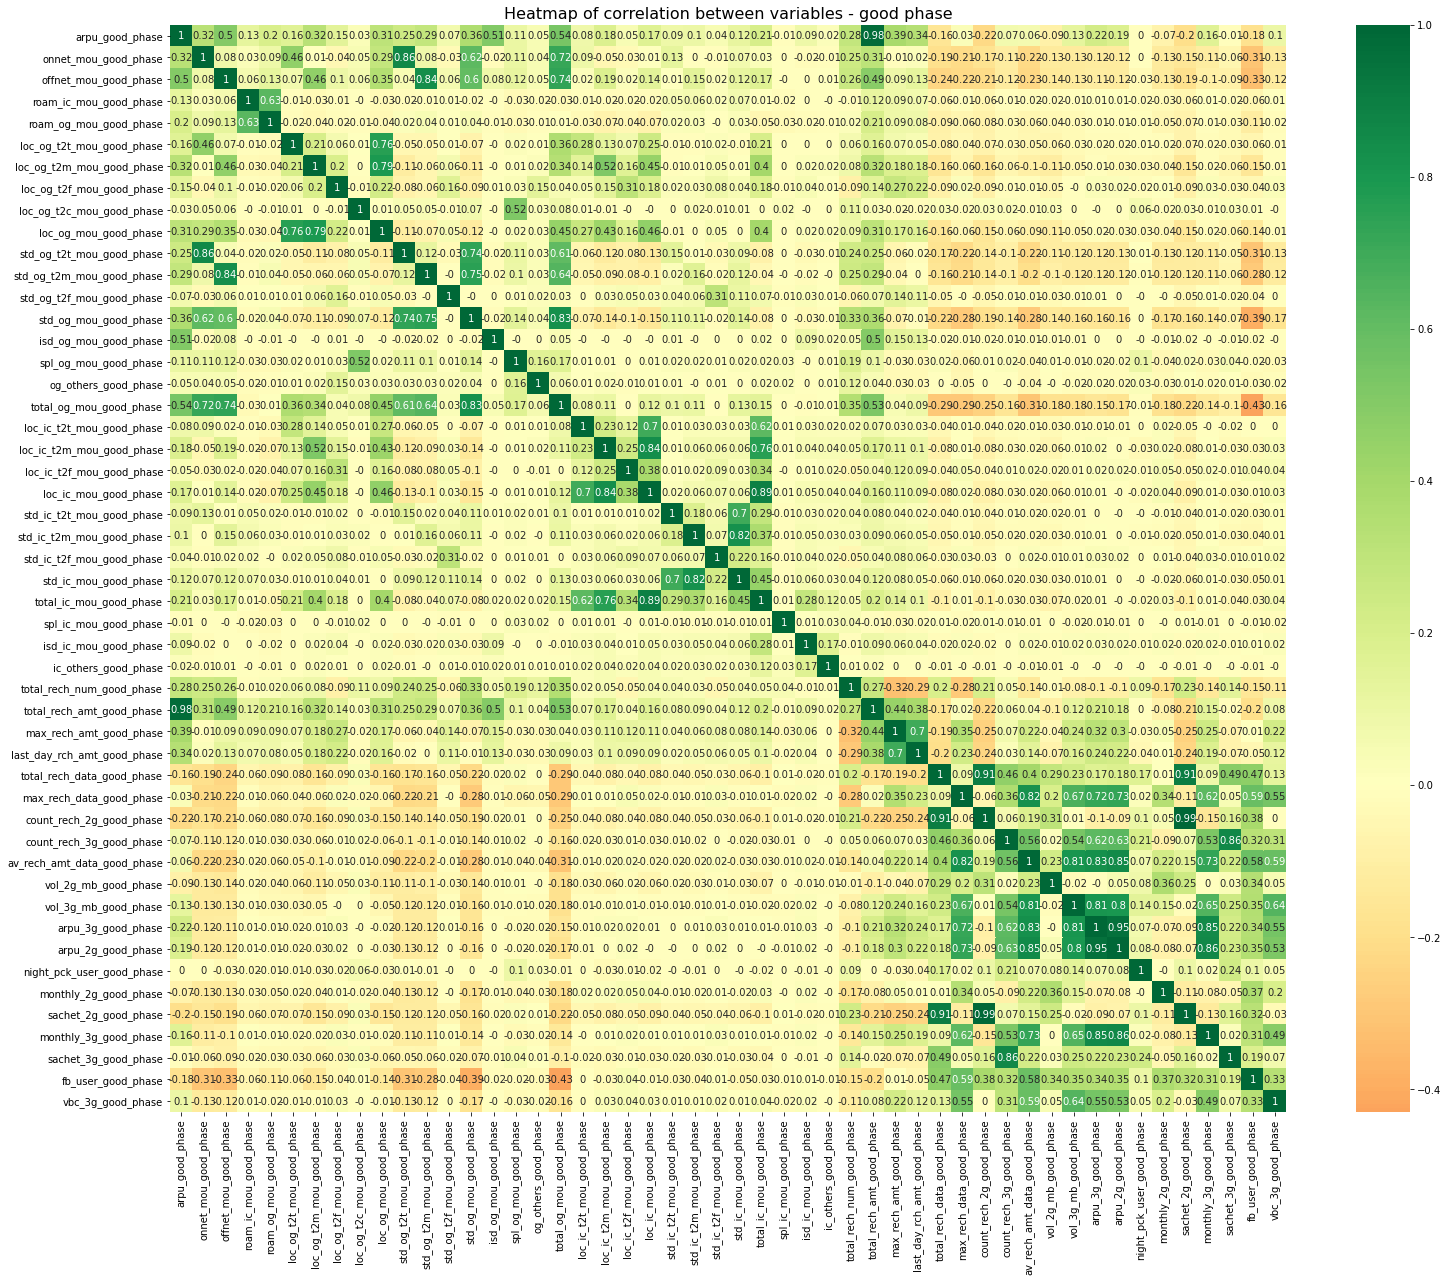

In [90]:
plt.figure(figsize= (25,20))
sns.heatmap(tel_knn[good_columns].corr().round(2),cmap='RdYlGn',annot=True,fmt='g',center=0)
plt.title('Heatmap of correlation between variables - good phase',fontsize=16)
plt.show()

In [91]:
# Checking the top correlated features
corr_matrix_good = tel_knn[good_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle_good  = (corr_matrix_good.where(np.triu(np.ones(corr_matrix_good.shape), k=1).astype(np.bool)))

highly_correlated_features_good = [(column,max(upper_triangle_good[column].round(2))) for column in upper_triangle_good.columns if any(upper_triangle_good[column] > 0.75)]

print("Total features with high correlation - ", len(highly_correlated_features_good))
df_good_high_corr = pd.DataFrame(highly_correlated_features_good,columns=['Features','Correlation']).sort_values('Correlation',ascending=False).reset_index(drop=True)
df_good_high_corr

Total features with high correlation -  17


Features  Correlation
0          sachet_2g_good_phase         0.99
1     total_rech_amt_good_phase         0.98
2            arpu_2g_good_phase         0.95
3      count_rech_2g_good_phase         0.91
4       total_ic_mou_good_phase         0.89
5         monthly_3g_good_phase         0.86
6     std_og_t2t_mou_good_phase         0.86
7          sachet_3g_good_phase         0.86
8         loc_ic_mou_good_phase         0.84
9     std_og_t2m_mou_good_phase         0.84
10           arpu_3g_good_phase         0.83
11      total_og_mou_good_phase         0.83
12        std_ic_mou_good_phase         0.82
13  av_rech_amt_data_good_phase         0.82
14         vol_3g_mb_good_phase         0.81
15        loc_og_mou_good_phase         0.79
16        std_og_mou_good_phase         0.75

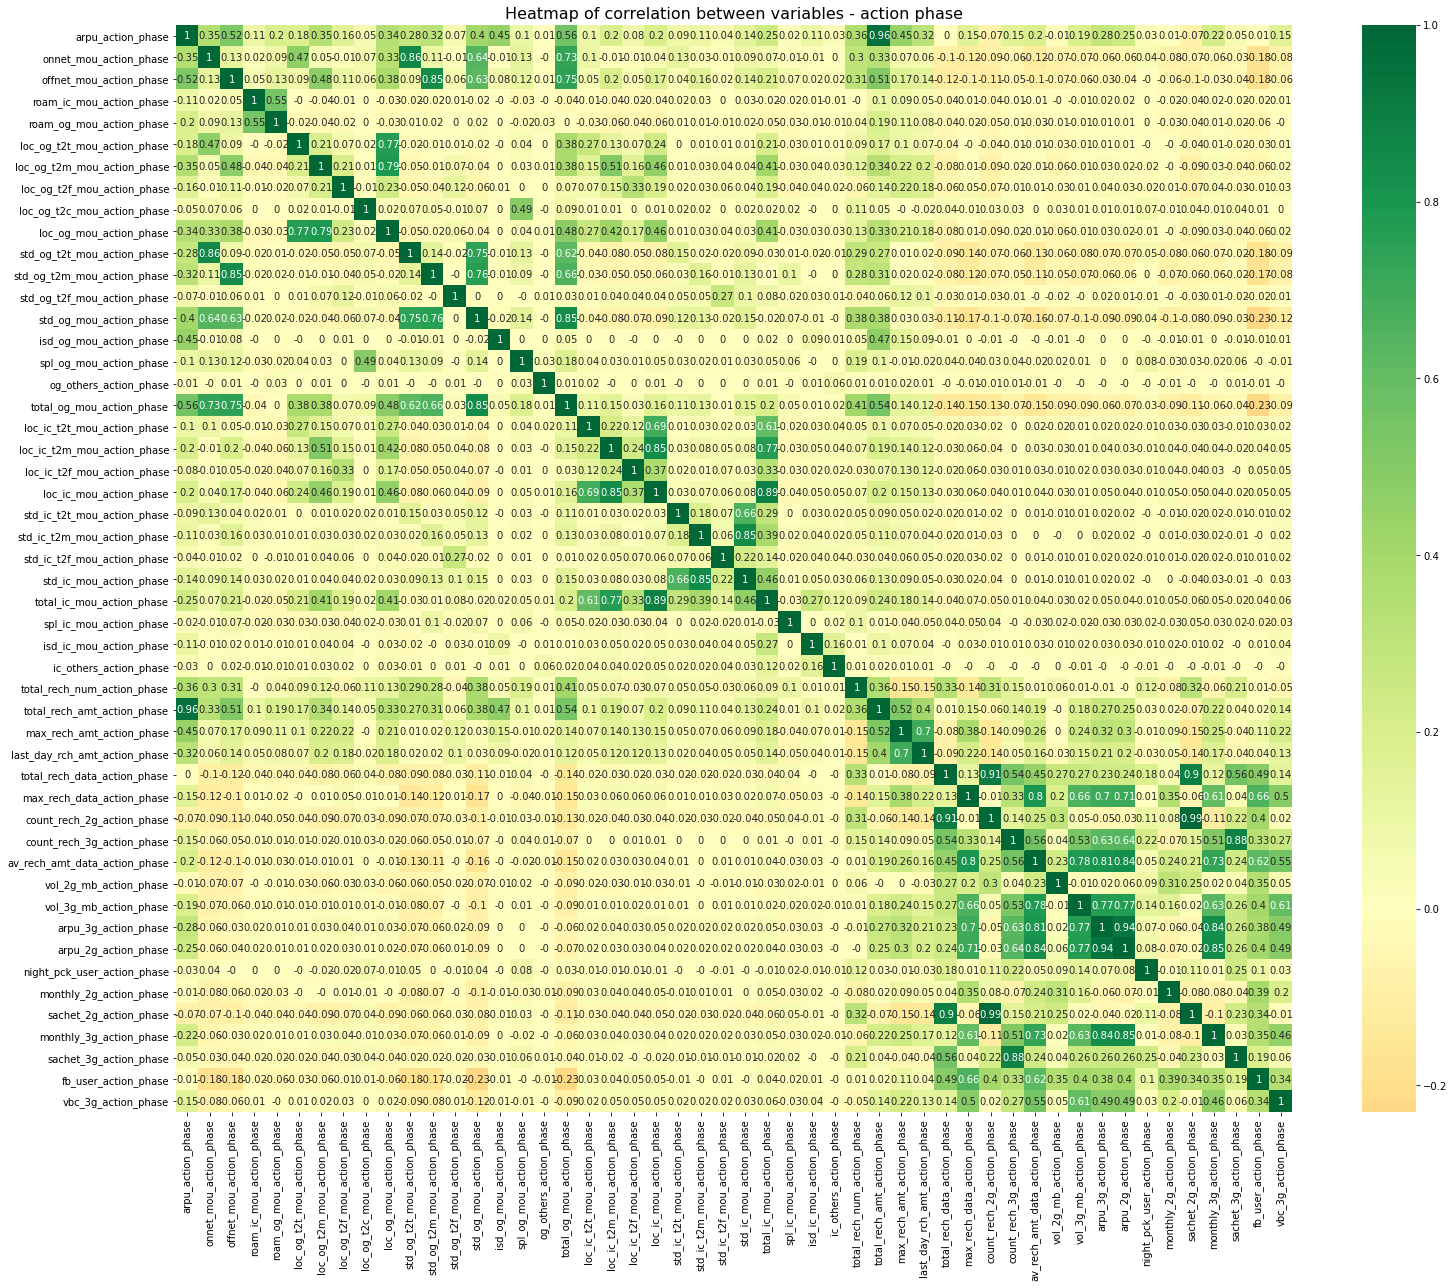

In [92]:
plt.figure(figsize= (25,20))
sns.heatmap(tel_knn[action_columns].corr().round(2),cmap='RdYlGn',annot=True,fmt='g',center=0)
plt.title('Heatmap of correlation between variables - action phase',fontsize=16)
plt.show()

In [93]:
# Checking the top correlated features
corr_matrix_action = tel_knn[action_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle_action  = (corr_matrix_action.where(np.triu(np.ones(corr_matrix_action.shape), k=1).astype(np.bool)))

highly_correlated_features_action = [(column,max(upper_triangle_action[column].round(2))) for column in upper_triangle_action.columns if any(upper_triangle_action[column] > 0.75)]

print("Total features with high correlation - ", len(highly_correlated_features_action))
df_action_high_corr = pd.DataFrame(highly_correlated_features_action,columns=['Features','Correlation']).sort_values('Correlation',ascending=False).reset_index(drop=True)
df_action_high_corr

Total features with high correlation -  17


Features  Correlation
0          sachet_2g_action_phase         0.99
1     total_rech_amt_action_phase         0.96
2            arpu_2g_action_phase         0.94
3      count_rech_2g_action_phase         0.91
4       total_ic_mou_action_phase         0.89
5          sachet_3g_action_phase         0.88
6     std_og_t2t_mou_action_phase         0.86
7         std_ic_mou_action_phase         0.85
8         loc_ic_mou_action_phase         0.85
9       total_og_mou_action_phase         0.85
10    std_og_t2m_mou_action_phase         0.85
11        monthly_3g_action_phase         0.85
12           arpu_3g_action_phase         0.81
13  av_rech_amt_data_action_phase         0.80
14        loc_og_mou_action_phase         0.79
15         vol_3g_mb_action_phase         0.78
16        std_og_mou_action_phase         0.76

- It is understood that the individual variables of outgoing,incoming,recharge amount, 2g & 3g consumptions & arpu shall be co-related to the aggregated respective total columns. Above heatmap & corr matrix had proved the same.

- Also, we have identified top features with high correlation.

### Pairplot for 5 variables

In [94]:
tel_knn[df_good_high_corr.head()['Features']].corr().round(2)

sachet_2g_good_phase  total_rech_amt_good_phase  \
sachet_2g_good_phase                       1.00                      -0.21   
total_rech_amt_good_phase                 -0.21                       1.00   
arpu_2g_good_phase                        -0.07                       0.18   
count_rech_2g_good_phase                   0.99                      -0.22   
total_ic_mou_good_phase                   -0.10                       0.20   

                           arpu_2g_good_phase  count_rech_2g_good_phase  \
sachet_2g_good_phase                    -0.07                      0.99   
total_rech_amt_good_phase                0.18                     -0.22   
arpu_2g_good_phase                       1.00                     -0.09   
count_rech_2g_good_phase                -0.09                      1.00   
total_ic_mou_good_phase                 -0.00                     -0.10   

                           total_ic_mou_good_phase  
sachet_2g_good_phase                          -0.1  
total_rech_amt_good_phase                      0.2  
arpu_2g_good_phase                            -0.0  
count_rech_2g_good_phase                      -0.1  
total_ic_mou_good_phase                        1.0

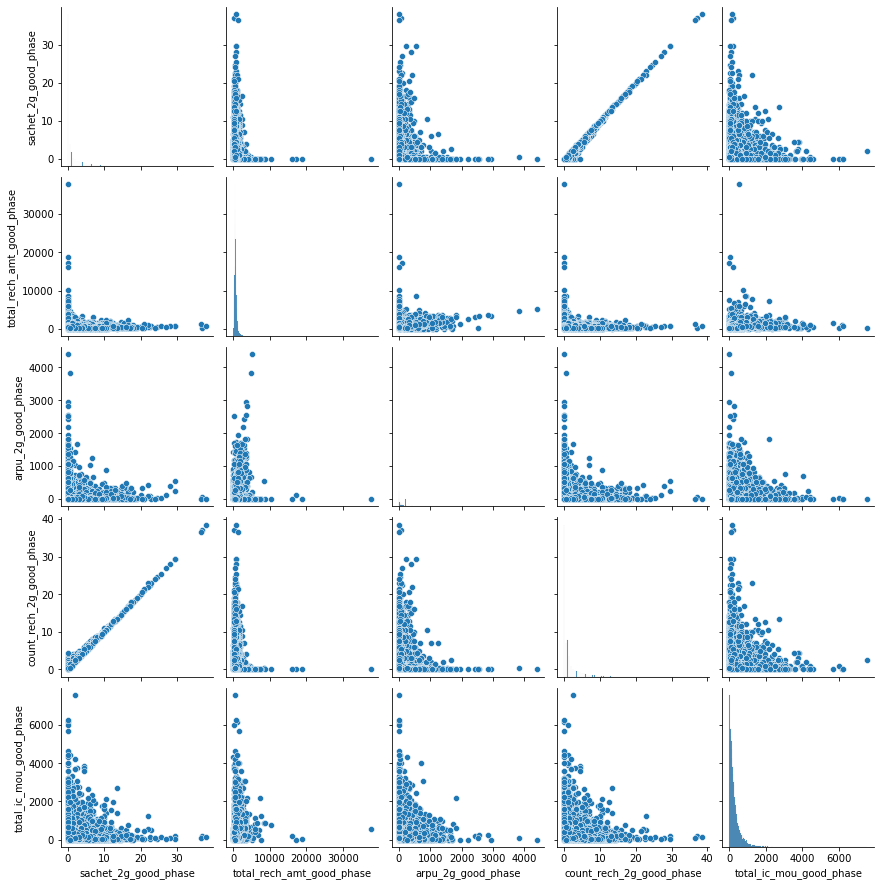

In [95]:
sns.pairplot(tel_knn[df_good_high_corr.head()['Features']])
plt.show()

- sachet_2g_good_phase and count_rech_2g_good_phase are with high correlation
- All the other correlation is seem to be very low

In [96]:
tel_knn[df_action_high_corr.head()['Features']].corr().round(2)

sachet_2g_action_phase  \
sachet_2g_action_phase                         1.00   
total_rech_amt_action_phase                   -0.07   
arpu_2g_action_phase                          -0.02   
count_rech_2g_action_phase                     0.99   
total_ic_mou_action_phase                     -0.06   

                             total_rech_amt_action_phase  \
sachet_2g_action_phase                             -0.07   
total_rech_amt_action_phase                         1.00   
arpu_2g_action_phase                                0.25   
count_rech_2g_action_phase                         -0.06   
total_ic_mou_action_phase                           0.24   

                             arpu_2g_action_phase  count_rech_2g_action_phase  \
sachet_2g_action_phase                      -0.02                        0.99   
total_rech_amt_action_phase                  0.25                       -0.06   
arpu_2g_action_phase                         1.00                       -0.03   
count_rech_2g_action_phase                  -0.03                        1.00   
total_ic_mou_action_phase                    0.04                       -0.05   

                             total_ic_mou_action_phase  
sachet_2g_action_phase                           -0.06  
total_rech_amt_action_phase                       0.24  
arpu_2g_action_phase                              0.04  
count_rech_2g_action_phase                       -0.05  
total_ic_mou_action_phase                         1.00

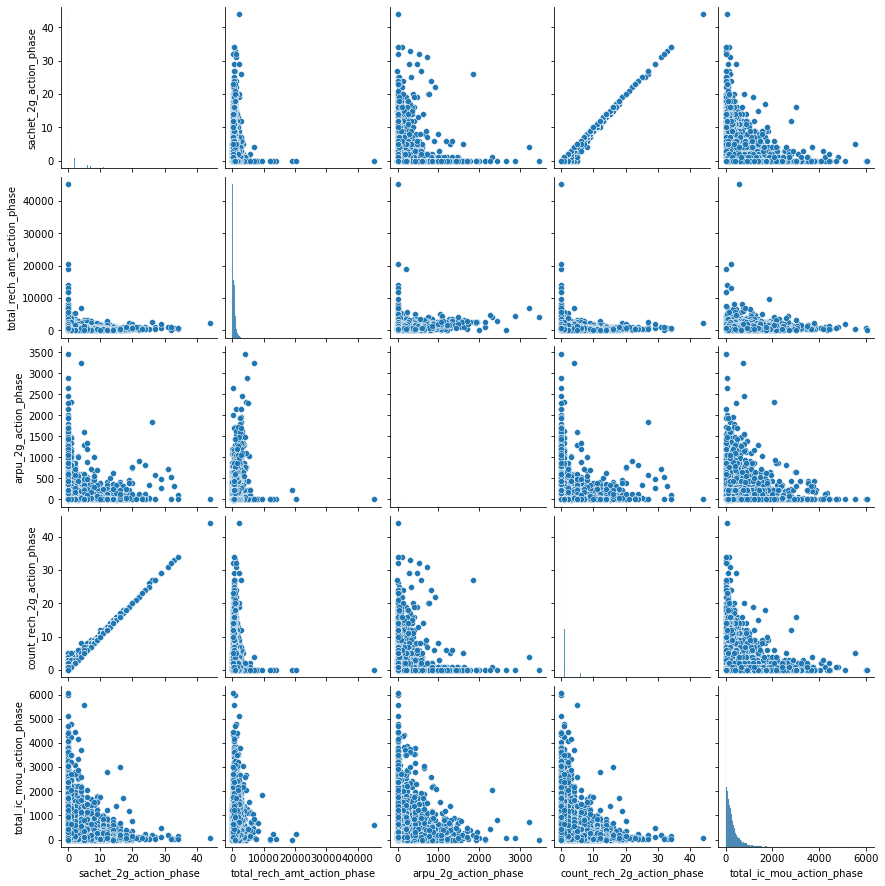

In [97]:
sns.pairplot(tel_knn[df_action_high_corr.head()['Features']])
plt.show()

- sachet_2g_good_phase and count_rech_2g_good_phase are with high correlation
- All the other correlation is seem to be very low

### Outlier Check for Numeric Variables

In [98]:
features = tel_knn.nunique()[tel_knn.nunique()>5].index.tolist()
print(features)

['aon', 'arpu_good_phase', 'arpu_action_phase', 'onnet_mou_good_phase', 'onnet_mou_action_phase', 'offnet_mou_good_phase', 'offnet_mou_action_phase', 'roam_ic_mou_good_phase', 'roam_ic_mou_action_phase', 'roam_og_mou_good_phase', 'roam_og_mou_action_phase', 'loc_og_t2t_mou_good_phase', 'loc_og_t2t_mou_action_phase', 'loc_og_t2m_mou_good_phase', 'loc_og_t2m_mou_action_phase', 'loc_og_t2f_mou_good_phase', 'loc_og_t2f_mou_action_phase', 'loc_og_t2c_mou_good_phase', 'loc_og_t2c_mou_action_phase', 'loc_og_mou_good_phase', 'loc_og_mou_action_phase', 'std_og_t2t_mou_good_phase', 'std_og_t2t_mou_action_phase', 'std_og_t2m_mou_good_phase', 'std_og_t2m_mou_action_phase', 'std_og_t2f_mou_good_phase', 'std_og_t2f_mou_action_phase', 'std_og_mou_good_phase', 'std_og_mou_action_phase', 'isd_og_mou_good_phase', 'isd_og_mou_action_phase', 'spl_og_mou_good_phase', 'spl_og_mou_action_phase', 'og_others_good_phase', 'og_others_action_phase', 'total_og_mou_good_phase', 'total_og_mou_action_phase', 'loc_ic_

In [99]:
def all_40_boxplots(cols):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(cols):
        plt.subplot(10,4,i+1)    
        sns.boxplot(tel_knn[col])
    plt.tight_layout()
    plt.show()

**Features before capping**

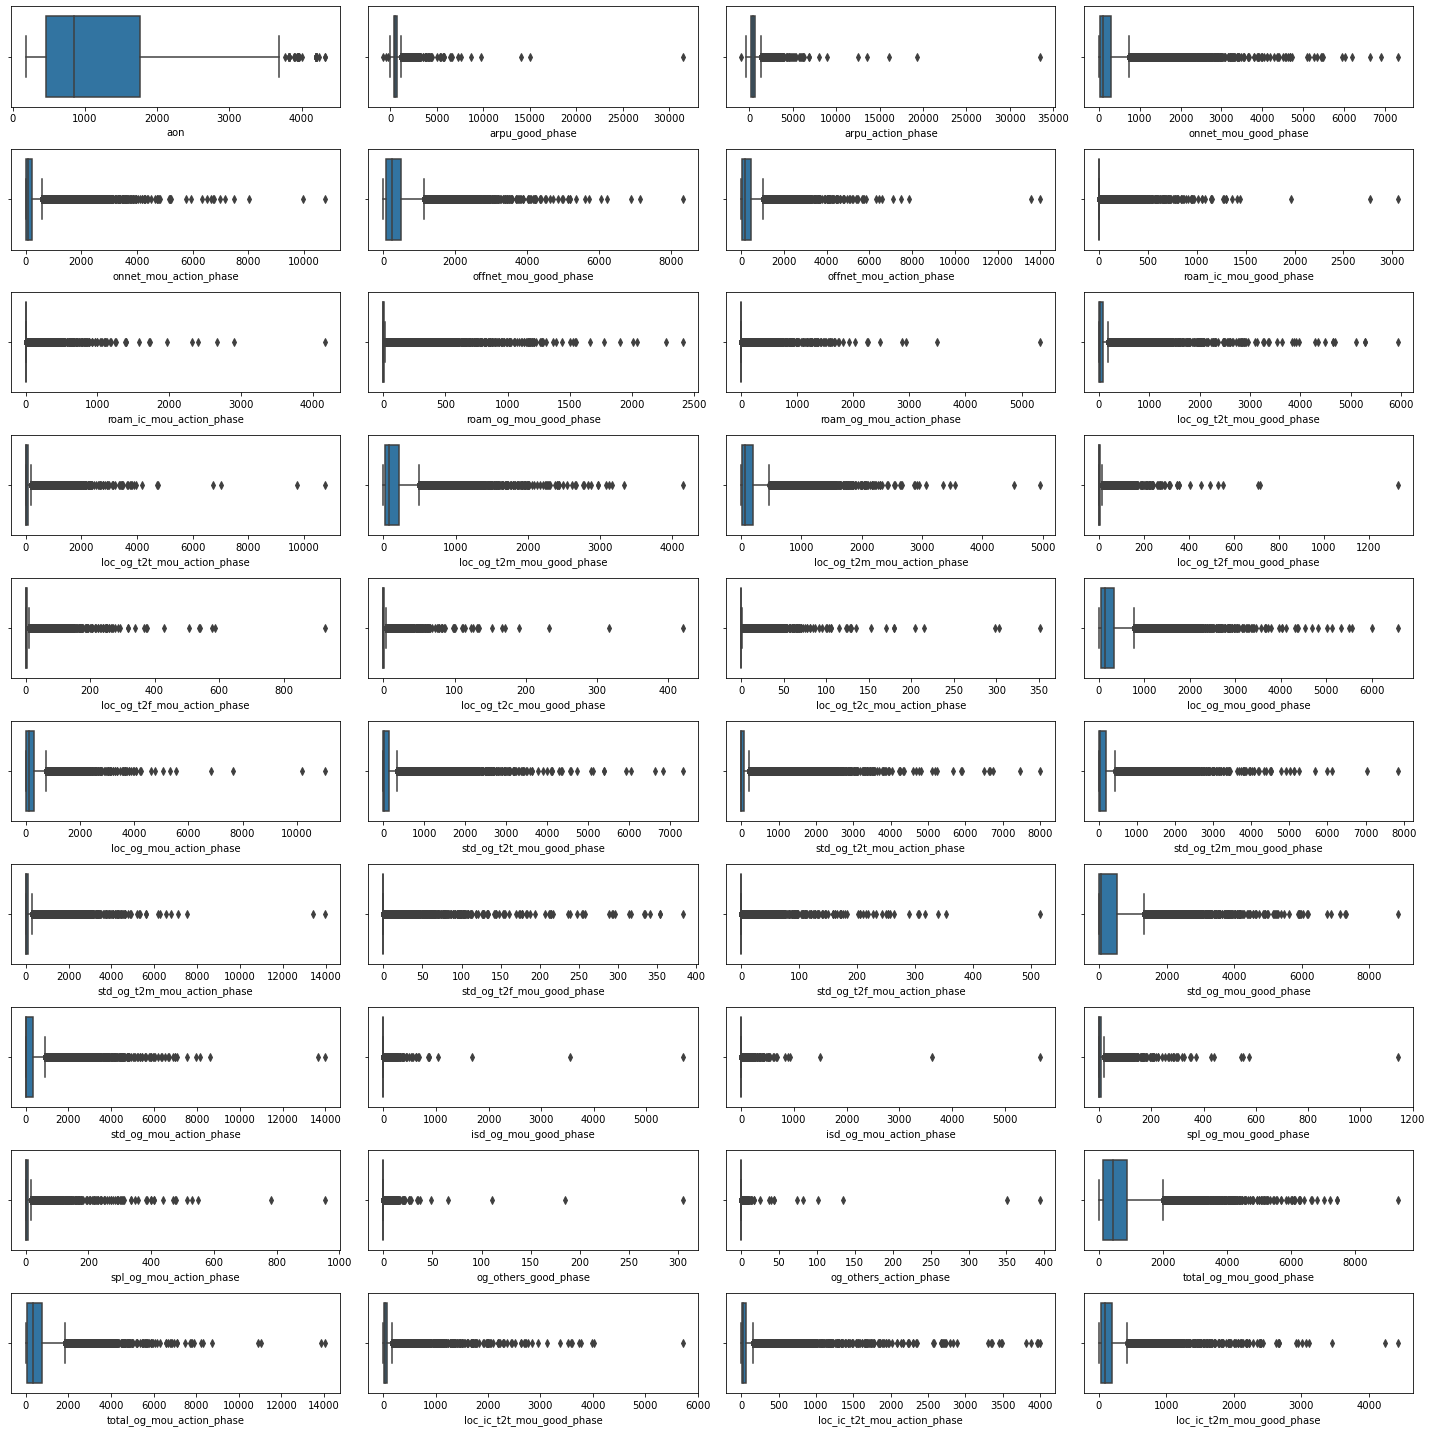

In [100]:
all_40_boxplots(features[:40])

For all the features except ```aon``` has too many outlier towards the higher values for the first 40 features. So we can cap these to 1 percentile and 99th percentile value

In [101]:
for col in features[:40]:
    if col!='aon':
        tel_knn.loc[tel_knn[col]>tel_knn[col].quantile(0.99),col]=tel_knn[col].quantile(0.99)
        tel_knn.loc[tel_knn[col]<tel_knn[col].quantile(0.01),col]=tel_knn[col].quantile(0.01)

**Features after capping**

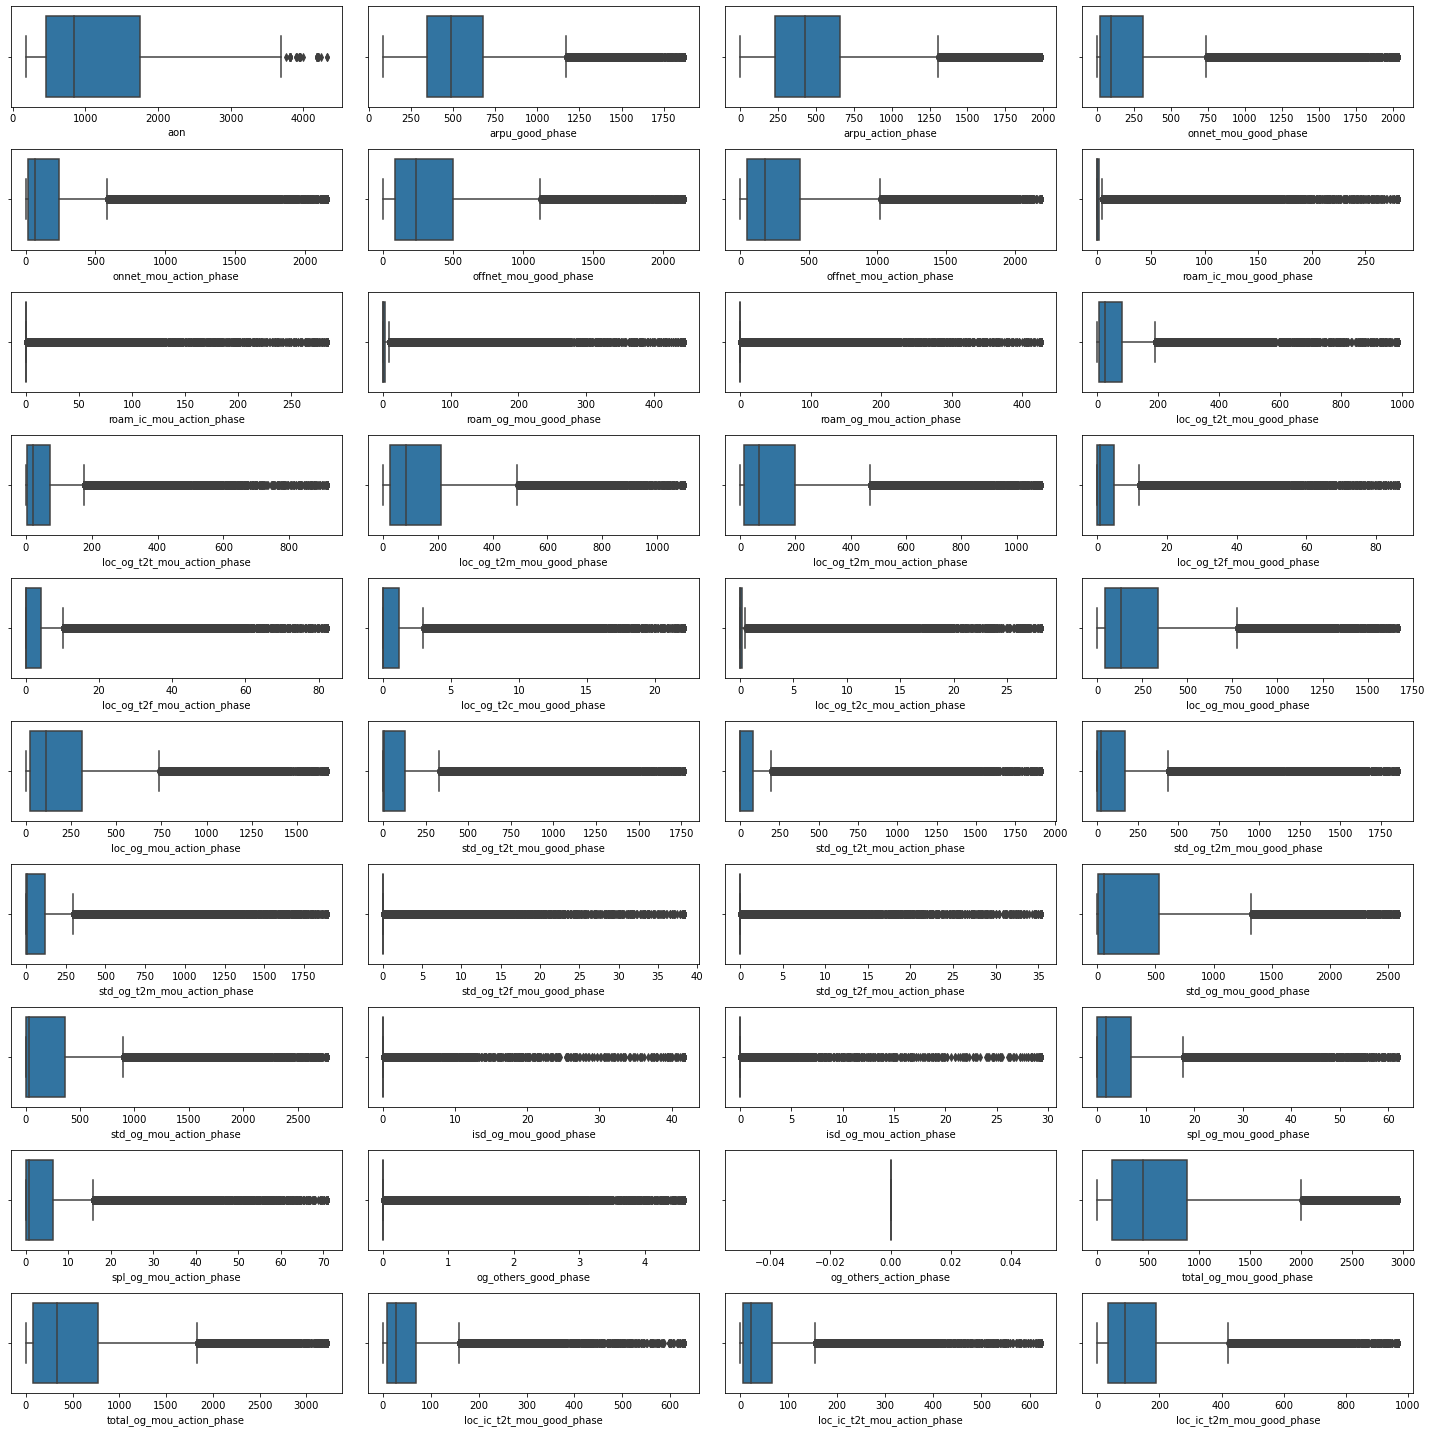

In [102]:
all_40_boxplots(features[:40])

**Features before capping**

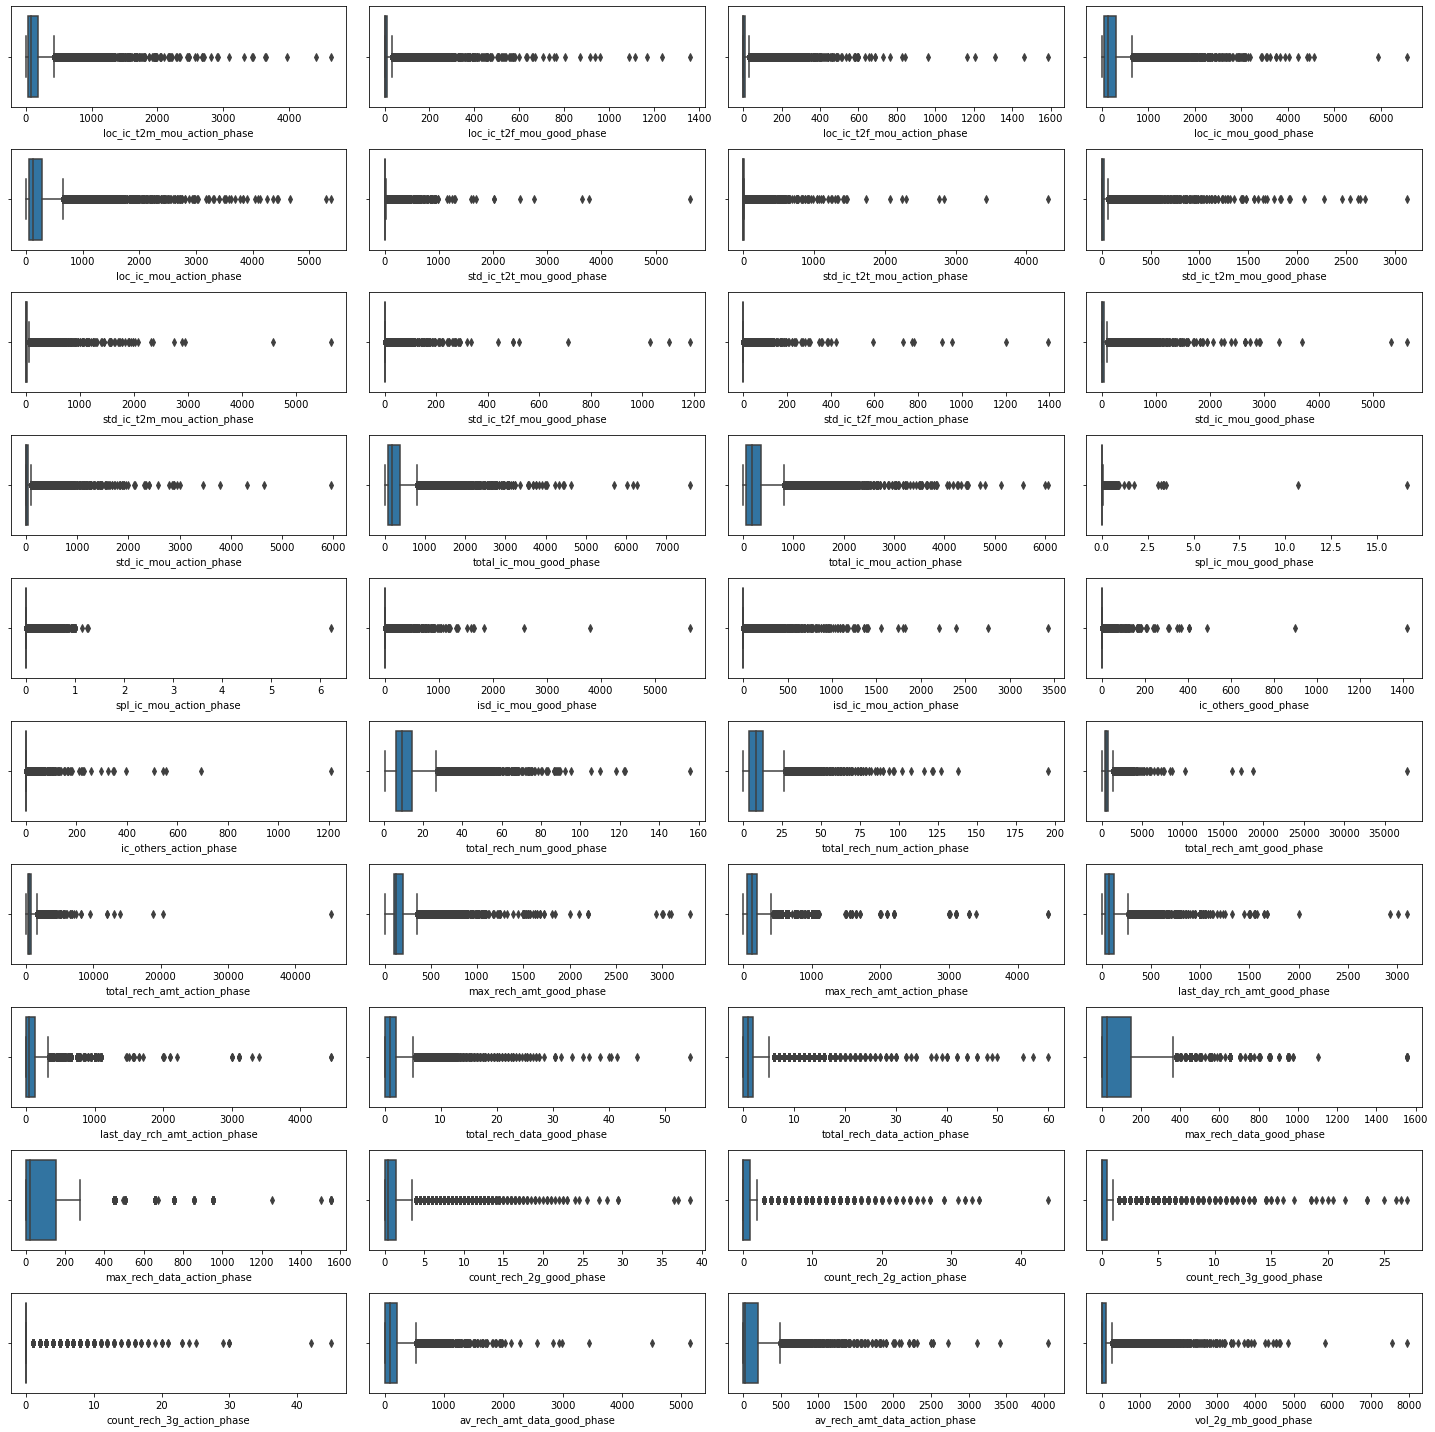

In [103]:
all_40_boxplots(features[40:80])

For all the features has too many outlier towards the higher values for the first 40 features. So we can cap these to 1 percentile and 99th percentile value

**Features after capping**

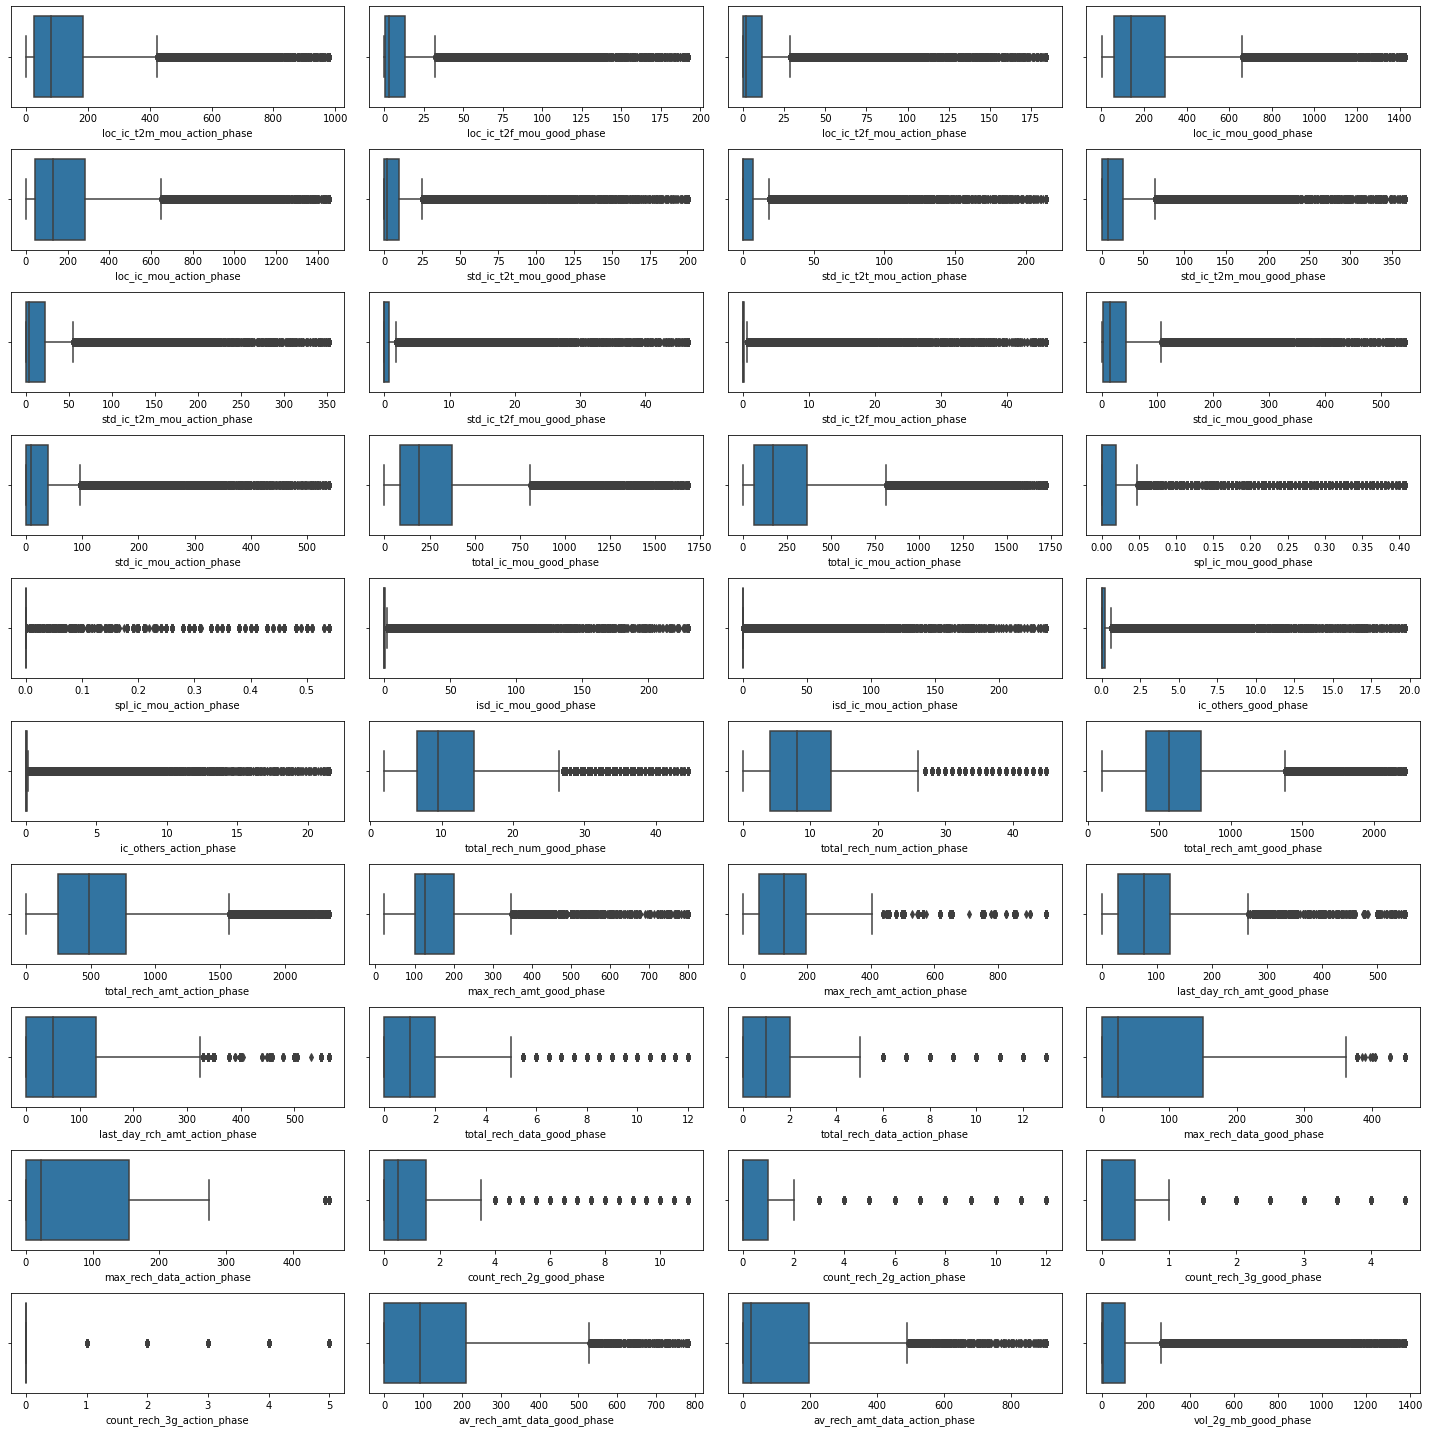

In [104]:
for col in features[40:80]:
    tel_knn.loc[tel_knn[col]>tel_knn[col].quantile(0.99),col]=tel_knn[col].quantile(0.99)
    tel_knn.loc[tel_knn[col]<tel_knn[col].quantile(0.01),col]=tel_knn[col].quantile(0.01)
all_40_boxplots(features[40:80])

**Features before capping**

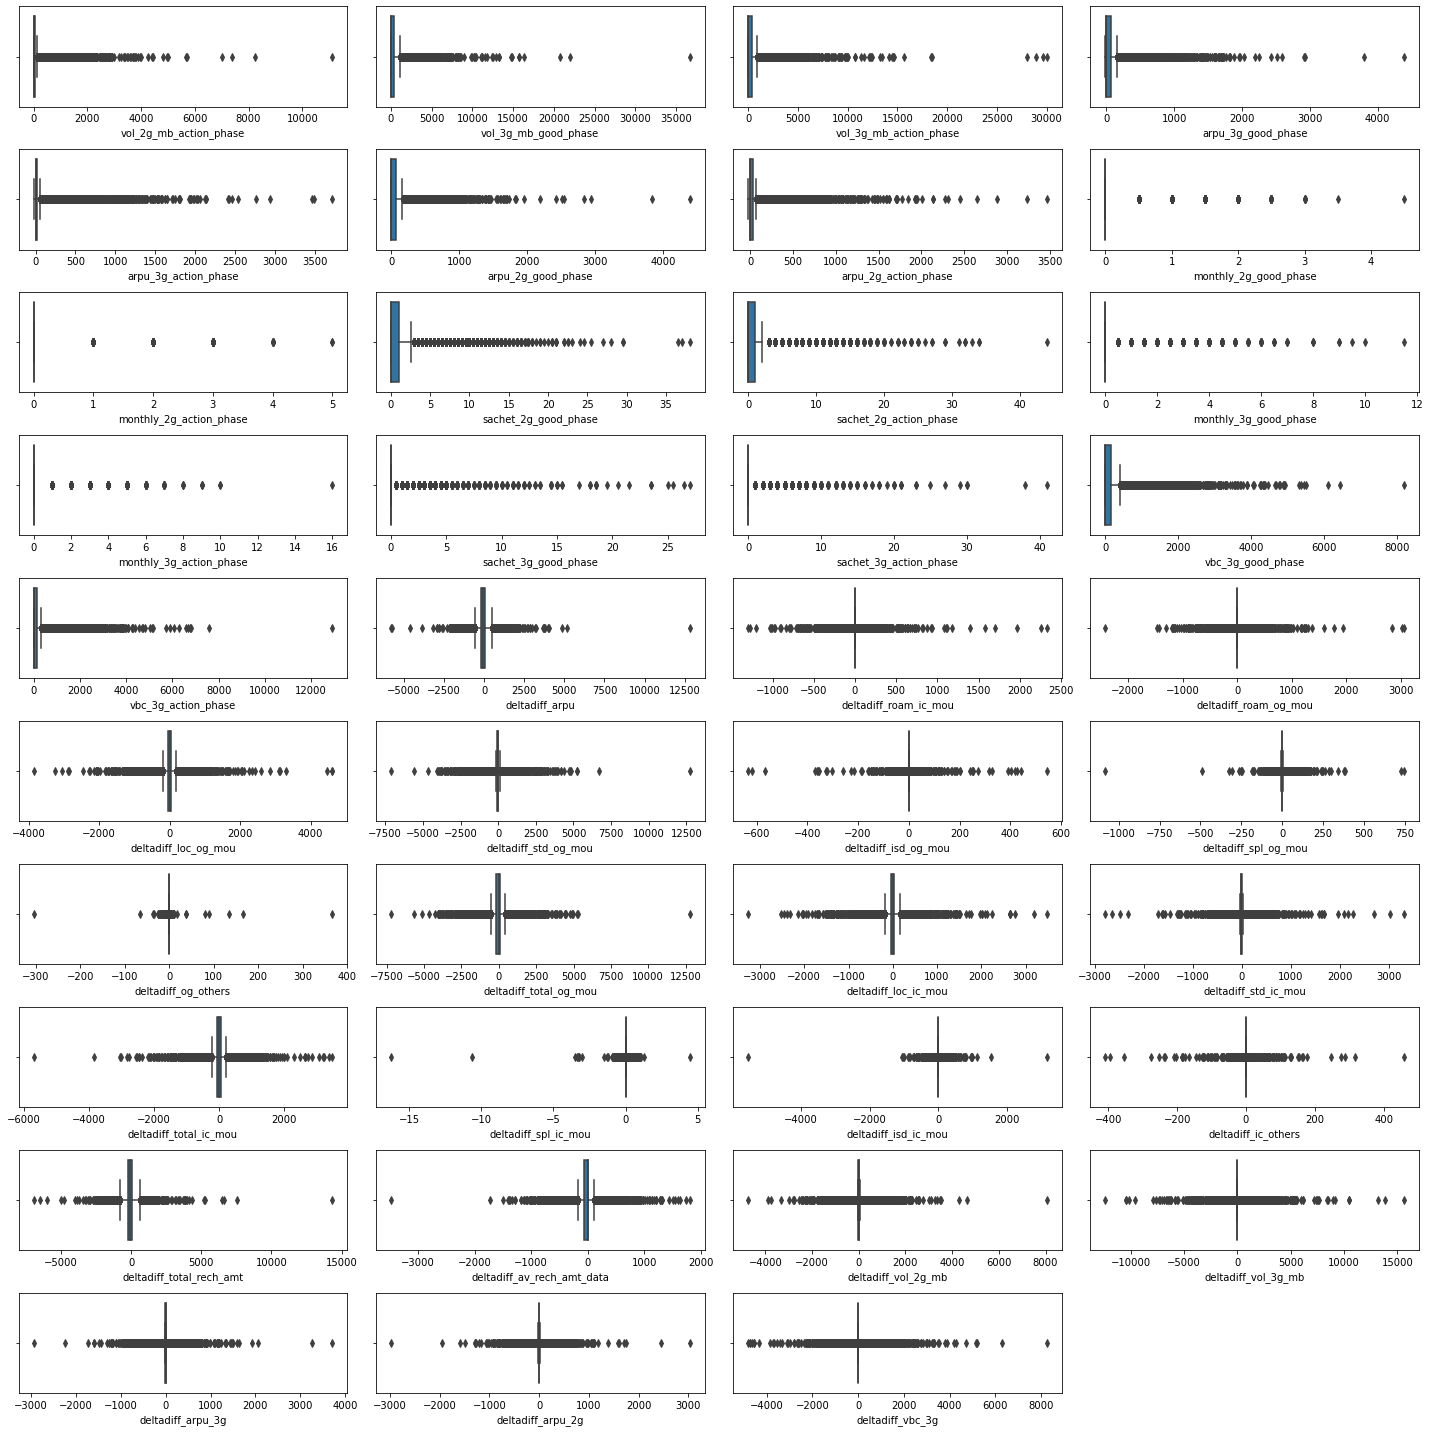

In [105]:
all_40_boxplots(features[80:120])

For all the features has too many outlier towards the higher values for the first 40 features. So we can cap these to 1 percentile and 99th percentile value

In [106]:
for col in features[80:119]:
    tel_knn.loc[tel_knn[col]>tel_knn[col].quantile(0.99),col]=tel_knn[col].quantile(0.99)
    tel_knn.loc[tel_knn[col]<tel_knn[col].quantile(0.01),col]=tel_knn[col].quantile(0.01)

**Features after capping**

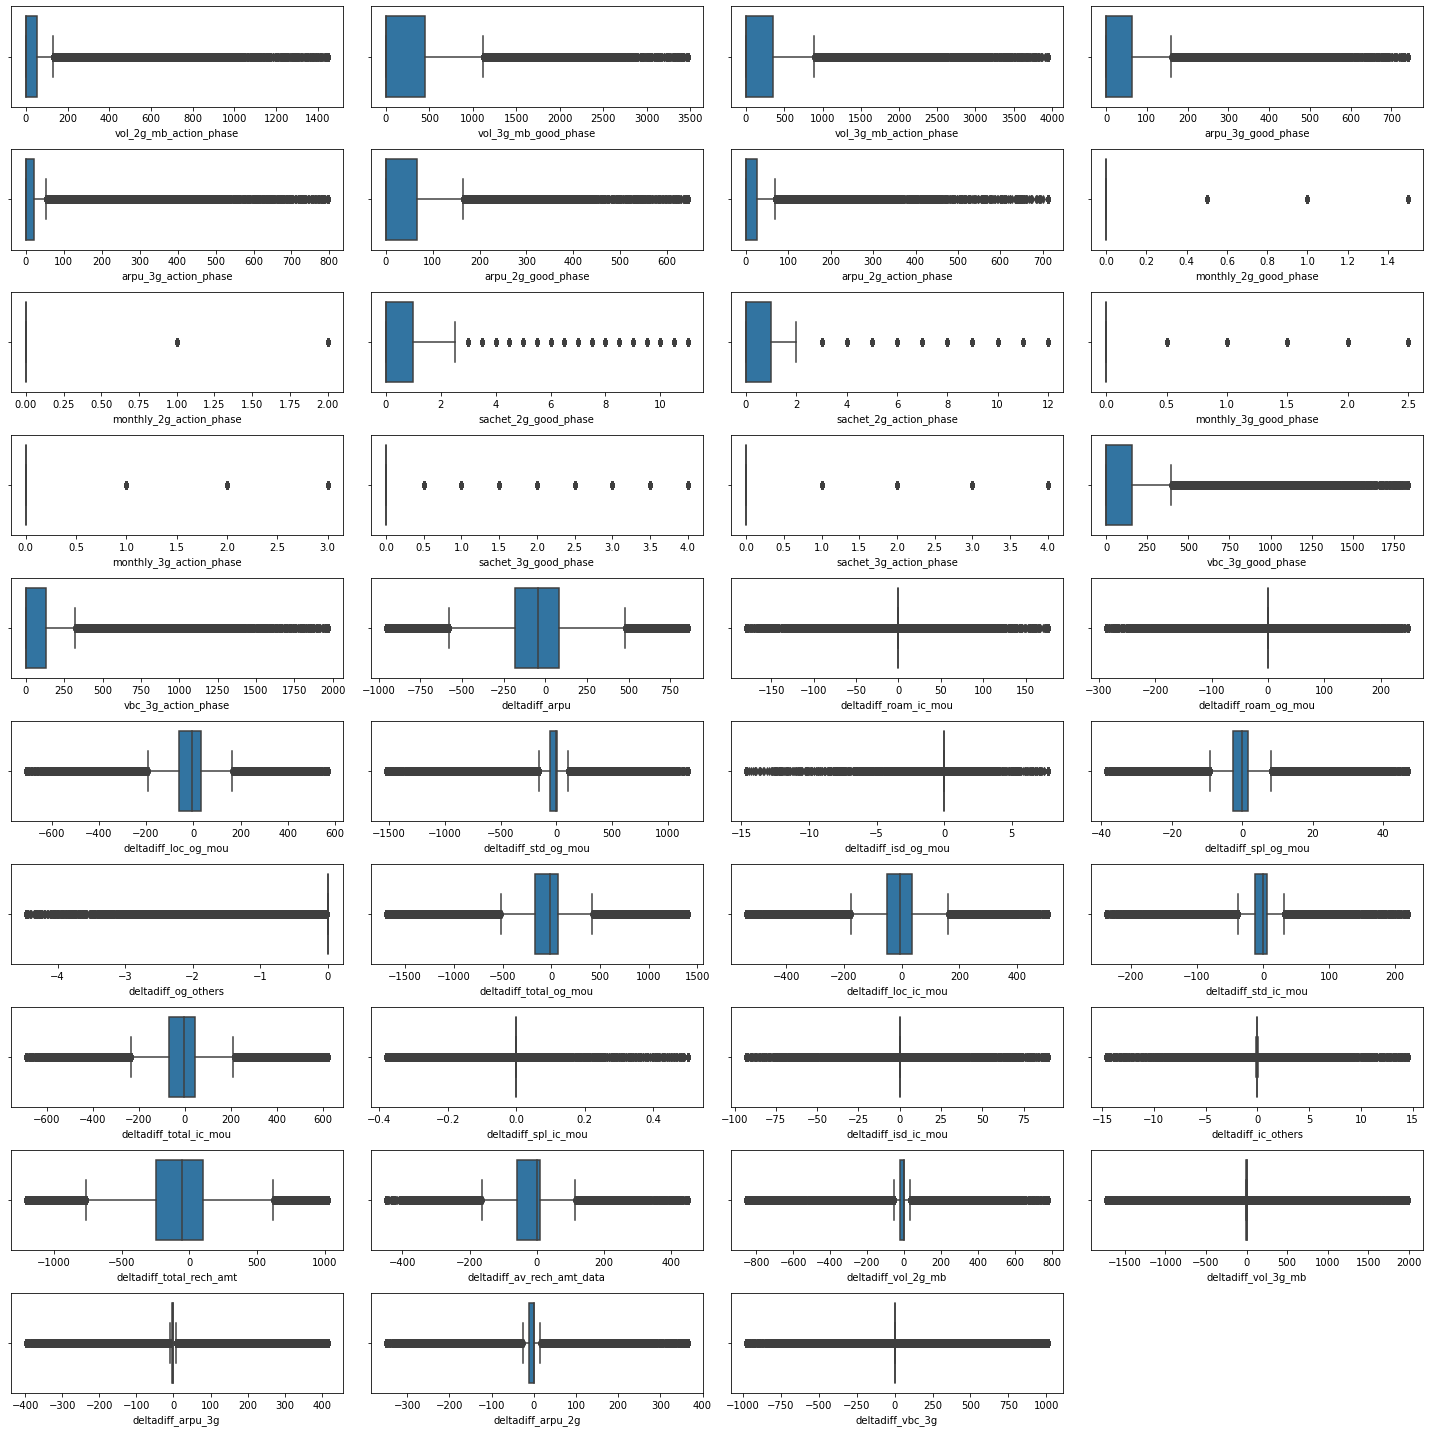

In [107]:
all_40_boxplots(features[80:119])

## Model Building

### Interpretable Model : Using RFE and Logistic Regression

In [108]:
tel_knn.head()

aon  churn  arpu_good_phase  arpu_action_phase  onnet_mou_good_phase  \
0  968.0      1         206.1005           213.8030                 5.132   
1  802.0      1        1209.5150          1986.7396                56.260   
2  315.0      0         435.4720           137.3620               382.360   
3  720.0      0         556.1030           637.7600               117.260   
4  604.0      0         134.1235           366.9660                49.810   

   onnet_mou_action_phase  offnet_mou_good_phase  offnet_mou_action_phase  \
0                    0.00                 34.761                     0.00   
1                   52.29                510.295                   325.91   
2                   35.08                 87.645                   136.48   
3                   85.14                827.305                   983.39   
4                   33.58                 87.385                   205.89   

   roam_ic_mou_good_phase  roam_ic_mou_action_phase  roam_og_mou_good_phase  \
0                  14.587                      0.00                  12.052   
1                  24.860                     31.64                  18.165   
2                   0.000                      0.00                   0.000   
3                   0.000                      0.00                   0.000   
4                   0.000                      0.00                   0.000   

   roam_og_mou_action_phase  loc_og_t2t_mou_good_phase  \
0                      0.00                      1.808   
1                     38.06                     41.385   
2                      0.00                    257.360   
3                      0.00                      5.320   
4                      0.00                     49.810   

   loc_og_t2t_mou_action_phase  loc_og_t2m_mou_good_phase  \
0                         0.00                     14.174   
1                        40.28                    378.005   
2                        12.49                     75.770   
3                        23.34                     89.870   
4                        33.58                     82.975   

   loc_og_t2m_mou_action_phase  loc_og_t2f_mou_good_phase  \
0                         0.00                      1.844   
1                       162.28                     58.635   
2                        50.54                      0.000   
3                       104.81                      0.375   
4                       148.56                      0.000   

   loc_og_t2f_mou_action_phase  loc_og_t2c_mou_good_phase  \
0                         0.00                        0.0   
1                        53.23                        0.0   
2                         0.00                        0.0   
3                         1.58                        0.0   
4                         0.00                        0.0   

   loc_og_t2c_mou_action_phase  loc_og_mou_good_phase  \
0                         0.00                 17.829   
1                         0.00                478.035   
2                         7.15                333.135   
3                         0.00                 95.565   
4                        17.71                132.795   

   loc_og_mou_action_phase  std_og_t2t_mou_good_phase  \
0                     0.00                      1.546   
1                   255.79                     13.795   
2                    63.04                    124.995   
3                   129.74                    111.935   
4                   182.14                      0.000   

   std_og_t2t_mou_action_phase  std_og_t2m_mou_good_phase  \
0                         0.00                      5.779   
1                        12.01                     40.825   
2                        22.58                     11.865   
3                        61.79                    737.050   
4                         0.00                      4.355   

   std_og_t2m_mou_action_phase  std_og_t2f_mou_good_phase  \
0                         0.00          

**Assigning Independent and dependent variables**

In [109]:
X = tel_knn.drop(columns='churn')
y = tel_knn['churn']  

**Train test split**

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print('Shape of X_train : ',X_train.shape)
print('Shape of X_test  : ',X_test.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of y_test  : ',y_test.shape)

Shape of X_train :  (20967, 123)
Shape of X_test  :  (8986, 123)
Shape of y_train :  (20967,)
Shape of y_test  :  (8986,)


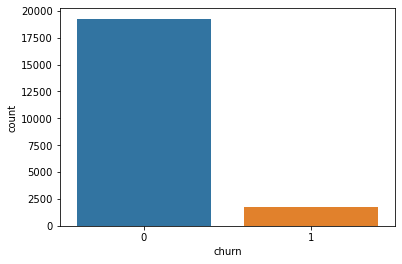

0    91.877713
1     8.122287
Name: churn, dtype: float64

In [111]:
sns.countplot(y_train)
plt.show()
y_train.value_counts(normalize=True)*100

**Since the Churn has high imbalance we shall carry out smote to perform over-sampling**

In [112]:
smote =SMOTE(random_state=42)
X_train, y_train = smote.fit_sample(X_train,y_train)
y_train = pd.Series(y_train,name='churn')
X_train = pd.DataFrame(X_train,columns=X.columns)

In [113]:
print('Shape of X_train : ',X_train.shape)
print('Shape of y_train : ',y_train.shape)

Shape of X_train :  (38528, 123)
Shape of y_train :  (38528,)


In [114]:
pd.Series(y_train).value_counts(normalize=True)*100

1    50.0
0    50.0
Name: churn, dtype: float64

- It is observed that the class imbalance is taken care of by the SMOTE

#### **Scaling the independent variables**

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)

#### **Recursive Feature Elimination** 
**RFE is carried out on the dataset for selecting 20 features.**

In [116]:
logreg = LogisticRegression()

rfe = RFE(logreg,20)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [117]:
features=list(X_train.columns[rfe.support_])
features

['onnet_mou_good_phase',
 'offnet_mou_good_phase',
 'loc_og_mou_good_phase',
 'std_og_t2t_mou_good_phase',
 'std_og_t2m_mou_good_phase',
 'std_og_mou_good_phase',
 'std_og_mou_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_action_phase',
 'fb_user_action_phase',
 'deltadiff_std_og_mou',
 'deltadiff_total_ic_mou',
 'deltadiff_spl_ic_mou']

**Function to perform logistic regression model on the data set and to calculate the VIF**

In [118]:
def log_model(features, lr_or_vif='lr'):
    if lr_or_vif=='lr':
        X_train_sm = sm.add_constant(X_train[features])
        lr_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
        lr_model_fit = lr_model.fit()
        print(lr_model_fit.summary())
        return lr_model_fit
    else:
        vif_df = pd.DataFrame() 
        vif_df["feature"] = features
        vif_df["VIF"] = [variance_inflation_factor(X_train[features].values, i) 
                                  for i in range(len(X_train[features].columns))] 
        display(vif_df.sort_values(by='VIF',ascending=False).reset_index(drop=True))

#### **Logistic Regression : Model 1**

In [119]:
log_model(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15851.
Date:                Mon, 08 Feb 2021   Deviance:                       31701.
Time:                        21:32:14   Pearson chi2:                 4.72e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- All the features are significant with p values less than 0.05

**VIF Calculation**

In [120]:
log_model(features,'vif')

feature         VIF
0       std_og_mou_good_phase  186.139011
1     total_og_mou_good_phase  106.006832
2        deltadiff_spl_ic_mou   84.678630
3       spl_ic_mou_good_phase   52.343141
4     spl_ic_mou_action_phase   50.607375
5   std_og_t2t_mou_good_phase   44.226713
6   std_og_t2m_mou_good_phase   42.554825
7   total_ic_mou_action_phase   35.023536
8     std_og_mou_action_phase   28.987141
9       loc_og_mou_good_phase   21.620630
10       onnet_mou_good_phase   21.463401
11    total_ic_mou_good_phase   20.133737
12      offnet_mou_good_phase   20.067902
13       deltadiff_std_og_mou   19.904662
14    loc_ic_mou_action_phase   18.953327
15  total_og_mou_action_phase   13.186229
16     deltadiff_total_ic_mou   10.462408
17    std_ic_mou_action_phase    3.617211
18    isd_ic_mou_action_phase    1.532971
19       fb_user_action_phase    1.215507

- VIF for some features are very high meaning that there are highly correlated features. 
- Removing one of the highly correlated features ```std_og_mou_good_phase```

In [121]:
features.remove('std_og_mou_good_phase')
features

['onnet_mou_good_phase',
 'offnet_mou_good_phase',
 'loc_og_mou_good_phase',
 'std_og_t2t_mou_good_phase',
 'std_og_t2m_mou_good_phase',
 'std_og_mou_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_action_phase',
 'fb_user_action_phase',
 'deltadiff_std_og_mou',
 'deltadiff_total_ic_mou',
 'deltadiff_spl_ic_mou']

#### **Logistic Regression : Model 2**

In [122]:
log_model(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15868.
Date:                Mon, 08 Feb 2021   Deviance:                       31736.
Time:                        21:32:15   Pearson chi2:                 7.66e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- All features are significant with p-value < 0.05. 

Lets analyze the VIF for multicollinearity

In [123]:
log_model(features,'vif')

feature        VIF
0        deltadiff_spl_ic_mou  84.670151
1       spl_ic_mou_good_phase  52.335078
2     spl_ic_mou_action_phase  50.604983
3     total_og_mou_good_phase  43.433953
4   total_ic_mou_action_phase  35.021589
5   std_og_t2t_mou_good_phase  27.903860
6   std_og_t2m_mou_good_phase  27.109573
7     std_og_mou_action_phase  26.682346
8        onnet_mou_good_phase  20.932699
9     total_ic_mou_good_phase  20.103082
10      offnet_mou_good_phase  19.706518
11       deltadiff_std_og_mou  18.950017
12    loc_ic_mou_action_phase  18.899698
13  total_og_mou_action_phase  12.812728
14      loc_og_mou_good_phase  12.389574
15     deltadiff_total_ic_mou  10.461408
16    std_ic_mou_action_phase   3.616702
17    isd_ic_mou_action_phase   1.532750
18       fb_user_action_phase   1.215397

- ```deltadiff_spl_ic_mou``` has high VIF

#### **Logistic Regression : Model 3**

In [124]:
features.remove('deltadiff_spl_ic_mou')
log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38509
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15892.
Date:                Mon, 08 Feb 2021   Deviance:                       31785.
Time:                        21:32:15   Pearson chi2:                 6.50e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature        VIF
0     total_og_mou_good_phase  43.430919
1   total_ic_mou_action_phase  35.021452
2   std_og_t2t_mou_good_phase  27.903681
3   std_og_t2m_mou_good_phase  27.109220
4     std_og_mou_action_phase  26.682017
5        onnet_mou_good_phase  20.932569
6     total_ic_mou_good_phase  20.102816
7       offnet_mou_good_phase  19.706504
8        deltadiff_std_og_mou  18.949773
9     loc_ic_mou_action_phase  18.898841
10  total_og_mou_action_phase  12.811966
11      loc_og_mou_good_phase  12.389559
12     deltadiff_total_ic_mou  10.461058
13    std_ic_mou_action_phase   3.616602
14    isd_ic_mou_action_phase   1.532508
15       fb_user_action_phase   1.215042
16    spl_ic_mou_action_phase   1.052213
17      spl_ic_mou_good_phase   1.042388

- All features are significant with p-value < 0.05
- ```total_og_mou_good_phase``` has high VIF

#### **Logistic Regression : Model 4**

In [125]:
features.remove('total_og_mou_good_phase')
log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38510
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15901.
Date:                Mon, 08 Feb 2021   Deviance:                       31802.
Time:                        21:32:16   Pearson chi2:                 6.84e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature        VIF
0   total_ic_mou_action_phase  35.018409
1   std_og_t2t_mou_good_phase  25.882245
2     std_og_mou_action_phase  25.467818
3   std_og_t2m_mou_good_phase  24.467682
4     total_ic_mou_good_phase  20.100742
5     loc_ic_mou_action_phase  18.888683
6        onnet_mou_good_phase  18.273167
7       offnet_mou_good_phase  17.527417
8        deltadiff_std_og_mou  16.629588
9   total_og_mou_action_phase  12.630676
10     deltadiff_total_ic_mou  10.459426
11      loc_og_mou_good_phase   8.847522
12    std_ic_mou_action_phase   3.609414
13    isd_ic_mou_action_phase   1.532236
14       fb_user_action_phase   1.207308
15    spl_ic_mou_action_phase   1.052180
16      spl_ic_mou_good_phase   1.041455

- All features are significant with p-value < 0.05
- ```total_ic_mou_action_phase``` has high VIF

#### **Logistic Regression : Model 5**

In [126]:
features.remove('total_ic_mou_action_phase')
log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38511
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16118.
Date:                Mon, 08 Feb 2021   Deviance:                       32237.
Time:                        21:32:16   Pearson chi2:                 3.65e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature        VIF
0   std_og_t2t_mou_good_phase  25.875576
1     std_og_mou_action_phase  25.407596
2   std_og_t2m_mou_good_phase  24.449734
3        onnet_mou_good_phase  18.272594
4       offnet_mou_good_phase  17.516391
5        deltadiff_std_og_mou  16.626332
6     total_ic_mou_good_phase  14.050835
7   total_og_mou_action_phase  12.577023
8     loc_ic_mou_action_phase  10.778929
9       loc_og_mou_good_phase   8.845342
10     deltadiff_total_ic_mou   7.043197
11    std_ic_mou_action_phase   2.436998
12    isd_ic_mou_action_phase   1.293132
13       fb_user_action_phase   1.204982
14    spl_ic_mou_action_phase   1.052180
15      spl_ic_mou_good_phase   1.041433

- ```loc_ic_mou_action_phase``` has p-value>0.05
- All other features are significant with p-value < 0.05
- ```std_og_t2t_mou_good_phase``` has high VIF 

#### **Logistic Regression : Model 6**

In [127]:
features.remove('std_og_t2t_mou_good_phase')
log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38512
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16305.
Date:                Mon, 08 Feb 2021   Deviance:                       32609.
Time:                        21:32:16   Pearson chi2:                 1.36e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature        VIF
0     std_og_mou_action_phase  18.678913
1       offnet_mou_good_phase  14.489540
2     total_ic_mou_good_phase  14.049150
3   total_og_mou_action_phase  12.471223
4   std_og_t2m_mou_good_phase  12.216673
5        deltadiff_std_og_mou  10.929330
6     loc_ic_mou_action_phase  10.768220
7        onnet_mou_good_phase   8.227169
8      deltadiff_total_ic_mou   7.043089
9       loc_og_mou_good_phase   6.603357
10    std_ic_mou_action_phase   2.436697
11    isd_ic_mou_action_phase   1.293057
12       fb_user_action_phase   1.204648
13    spl_ic_mou_action_phase   1.051110
14      spl_ic_mou_good_phase   1.040079

- ```onnet_mou_good_phase``` and ```loc_ic_mou_action_phase``` have p-value>0.05
- All other features are significant with p-value < 0.05
- ```std_og_mou_action_phase``` has VIF>5

#### **Logistic Regression : Model 7**

In [128]:
features.remove('std_og_mou_action_phase')
log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38513
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16518.
Date:                Mon, 08 Feb 2021   Deviance:                       33037.
Time:                        21:32:17   Pearson chi2:                 1.03e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature        VIF
0     total_ic_mou_good_phase  14.049073
1       offnet_mou_good_phase  13.489878
2   std_og_t2m_mou_good_phase  11.244309
3     loc_ic_mou_action_phase  10.744363
4      deltadiff_total_ic_mou   6.951477
5   total_og_mou_action_phase   6.895627
6        deltadiff_std_og_mou   6.561557
7        onnet_mou_good_phase   4.933256
8       loc_og_mou_good_phase   3.579859
9     std_ic_mou_action_phase   2.435282
10    isd_ic_mou_action_phase   1.292283
11       fb_user_action_phase   1.203439
12    spl_ic_mou_action_phase   1.051035
13      spl_ic_mou_good_phase   1.038678

- ```std_og_t2m_mou_good_phase``` and ```loc_ic_mou_action_phase``` have p-value>0.05
- All other features are significant with p-value < 0.05
- ```total_ic_mou_good_phase``` has VIF>5

#### **Logistic Regression : Model 8**

In [129]:
features.remove('total_ic_mou_good_phase')
log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38514
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16719.
Date:                Mon, 08 Feb 2021   Deviance:                       33438.
Time:                        21:32:17   Pearson chi2:                 9.30e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature        VIF
0       offnet_mou_good_phase  13.489081
1   std_og_t2m_mou_good_phase  11.240285
2   total_og_mou_action_phase   6.889232
3        deltadiff_std_og_mou   6.552309
4        onnet_mou_good_phase   4.931702
5       loc_og_mou_good_phase   3.578746
6     loc_ic_mou_action_phase   1.780812
7      deltadiff_total_ic_mou   1.432672
8        fb_user_action_phase   1.201054
9     std_ic_mou_action_phase   1.154864
10    spl_ic_mou_action_phase   1.050512
11    isd_ic_mou_action_phase   1.038927
12      spl_ic_mou_good_phase   1.036850

- ```std_og_t2m_mou_good_phase``` has p-value > 0.05
- All other features are significant with p-value < 0.05
- ```offnet_mou_good_phase``` has VIF value greater than 5

#### **Logistic Regression : Model 9** 

In [130]:
features.remove('offnet_mou_good_phase')
log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38515
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16790.
Date:                Mon, 08 Feb 2021   Deviance:                       33580.
Time:                        21:32:17   Pearson chi2:                 9.78e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature       VIF
0   total_og_mou_action_phase  6.086416
1        deltadiff_std_og_mou  5.852688
2   std_og_t2m_mou_good_phase  4.449378
3        onnet_mou_good_phase  4.039146
4     loc_ic_mou_action_phase  1.775320
5       loc_og_mou_good_phase  1.719807
6      deltadiff_total_ic_mou  1.419553
7        fb_user_action_phase  1.182322
8     std_ic_mou_action_phase  1.150670
9     spl_ic_mou_action_phase  1.050387
10    isd_ic_mou_action_phase  1.038019
11      spl_ic_mou_good_phase  1.036664

- All features are significant with p-value<0.05
- ```total_og_mou_action_phase``` has VIF value > 5

#### **Logistic Regression : Model 10** - ***Final Model***

In [131]:
features.remove('total_og_mou_action_phase')
final_model = log_model(features)
log_model(features,'vif')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38516
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17038.
Date:                Mon, 08 Feb 2021   Deviance:                       34075.
Time:                        21:32:18   Pearson chi2:                 9.20e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

feature       VIF
0        deltadiff_std_og_mou  1.843280
1     loc_ic_mou_action_phase  1.687395
2       loc_og_mou_good_phase  1.614020
3   std_og_t2m_mou_good_phase  1.469352
4        onnet_mou_good_phase  1.355707
5      deltadiff_total_ic_mou  1.348656
6        fb_user_action_phase  1.182214
7     std_ic_mou_action_phase  1.148740
8     spl_ic_mou_action_phase  1.050275
9     isd_ic_mou_action_phase  1.037149
10      spl_ic_mou_good_phase  1.036580

- All p-values are within 0.05
- All VIF values are within 2

**Parameters and Coefficients for model features**

In [132]:
attr_weight = pd.DataFrame({'Features' : ['Intercept']+features, 'Coefficients' : final_model.params.values,
                             'Absolute' : abs(final_model.params.values)}).sort_values('Absolute',ascending=False)
attr_weight.reset_index(drop=True,inplace=True)
attr_weight[['Features',	'Coefficients']]

Features  Coefficients
0     loc_ic_mou_action_phase     -1.430715
1        fb_user_action_phase     -0.801616
2      deltadiff_total_ic_mou     -0.699914
3        deltadiff_std_og_mou     -0.617065
4                   Intercept     -0.299138
5     std_ic_mou_action_phase     -0.283949
6     spl_ic_mou_action_phase     -0.276471
7   std_og_t2m_mou_good_phase     -0.251093
8        onnet_mou_good_phase     -0.240105
9       loc_og_mou_good_phase     -0.173345
10    isd_ic_mou_action_phase      0.031714
11      spl_ic_mou_good_phase      0.030761

In [133]:
intercept_val = attr_weight.Coefficients[attr_weight.Features=='Intercept'].values[0]
intercept_val

-0.29913779062529944

#### **Logistic Regression Model Evaluation**

**Getting the predicted values on the train set**

In [134]:
X_train_sm = sm.add_constant(X_train[features])

y_train_pred = final_model.predict(X_train_sm)
y_train_pred[:10]

0    0.197533
1    0.149871
2    0.272295
3    0.001417
4    0.422291
5    0.019063
6    0.851385
7    0.087961
8    0.241577
9    0.191071
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19753294, 0.14987073, 0.27229458, 0.00141689, 0.42229115,
       0.01906297, 0.8513847 , 0.08796138, 0.24157661, 0.19107138])

**Creating a dataframe with the actual Churn flag and the predicted probabilities**

In [136]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final['Churn_Score'] = round(y_train_pred_final['Churn_prob']*100,0).astype(int)
y_train_pred_final.head()

Churn  Churn_prob  ID  Churn_Score
0      0    0.197533   0           20
1      0    0.149871   1           15
2      0    0.272295   2           27
3      0    0.001417   3            0
4      0    0.422291   4           42

**Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0**

In [137]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [138]:
y_train_pred_final.head()

Churn  Churn_prob  ID  Churn_Score  predicted
0      0    0.197533   0           20          0
1      0    0.149871   1           15          0
2      0    0.272295   2           27          0
3      0    0.001417   3            0          0
4      0    0.422291   4           42          0

**Confusion Matrix**

In [139]:
def cm_heatmap(cm):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm,cmap='Blues',annot=True,fmt='g')
    plt.xticks([.5,1.5],['Not Churn','Churn'])
    plt.yticks([.18,1.25],['Not Churn','Churn'])
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title('Confusion Matrix',fontsize=14)
    plt.xlabel('Predicted',fontsize=12)
    plt.ylabel('Actual',fontsize=12)
    plt.show()

In [140]:
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15473  3791]
 [ 3505 15759]]


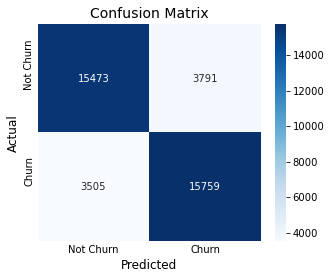

In [141]:
cm_heatmap(confusion)

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

**Accuracy Score**

In [143]:
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8106312292358804

**Classification Report**

In [144]:
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     19264
           1       0.81      0.82      0.81     19264

    accuracy                           0.81     38528
   macro avg       0.81      0.81      0.81     38528
weighted avg       0.81      0.81      0.81     38528



**Precision**

In [145]:
precision = TP / float(TP+FP)
precision

0.8060869565217391

In [146]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8060869565217391

**Sensitivity or Recall or True Positive rate**

In [147]:
recall = TP / float(TP+FN)
recall

0.8180544019933554

In [148]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8180544019933554

**F1 Score**

In [149]:
f1score = 2*precision*recall/(precision+recall)
f1score

0.8120265883444118

In [150]:
f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8120265883444118

**Specificity**

In [151]:
specificity = TN / float(TN+FP)
specificity

0.8032080564784053

##### **Precision Recall curve**

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

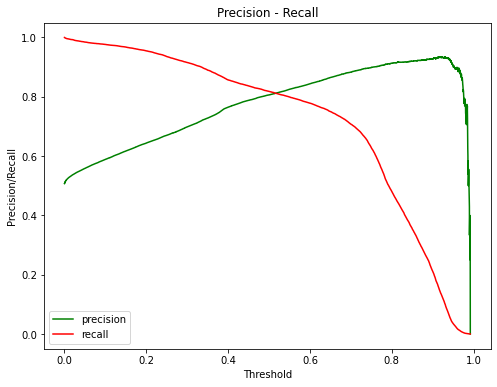

In [153]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['precision','recall'])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision - Recall')
plt.show()

##### **ROC Curve**


In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,  drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [155]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, 
                                  y_train_pred_final.Churn_prob, drop_intermediate = False )

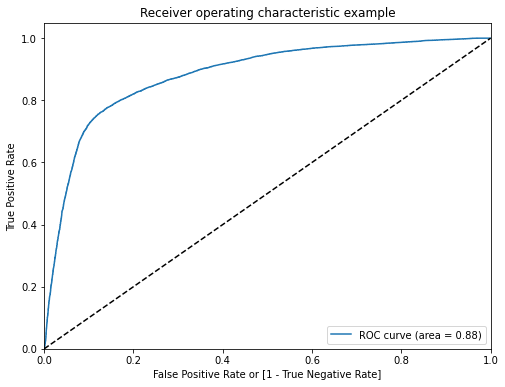

In [156]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

- The ROC Curve area value is 0.88 indicating a good predictive model.


##### **Finding Optimal Cutoff Point**

**Dataframe updated with different probability cutoffs**

In [157]:
for i in [x/100 for x in range(0,100,5)]:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_prob  ID  Churn_Score  predicted  0.0  0.05  0.1  0.15  0.2  \
0      0    0.197533   0           20          0    1     1    1     1    0   
1      0    0.149871   1           15          0    1     1    1     0    0   
2      0    0.272295   2           27          0    1     1    1     1    1   
3      0    0.001417   3            0          0    1     0    0     0    0   
4      0    0.422291   4           42          0    1     1    1     1    1   

   0.25  0.3  0.35  0.4  0.45  0.5  0.55  0.6  0.65  0.7  0.75  0.8  0.85  \
0     0    0     0    0     0    0     0    0     0    0     0    0     0   
1     0    0     0    0     0    0     0    0     0    0     0    0     0   
2     1    0     0    0     0    0     0    0     0    0     0    0     0   
3     0    0     0    0     0    0     0    0     0    0     0    0     0   
4     1    1     1    1     0    0     0    0     0    0     0    0     0   

   0.9  0.95  
0    0     0  
1    0     0  
2    0     0  
3    0     0  
4    0     0

**Dataframe with accuracy sensitivity and specificity for various probability cutoffs**

In [158]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

for i in [x/100 for x in range(0,100,5)]:
    cm = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00  0.500000     1.000000     0.000000
0.05  0.05  0.602938     0.984427     0.221449
0.10  0.10  0.647166     0.976485     0.317847
0.15  0.15  0.683295     0.967660     0.398931
0.20  0.20  0.713222     0.954838     0.471605
0.25  0.25  0.737412     0.935683     0.539140
0.30  0.30  0.760045     0.915594     0.604495
0.35  0.35  0.778706     0.890002     0.667411
0.40  0.40  0.796615     0.856883     0.736348
0.45  0.45  0.805674     0.836534     0.774813
0.50  0.50  0.810631     0.818054     0.803208
0.55  0.55  0.815018     0.799367     0.830669
0.60  0.60  0.817068     0.778291     0.855845
0.65  0.65  0.816419     0.750208     0.882631
0.70  0.70  0.806998     0.707849     0.906146
0.75  0.75  0.778732     0.628426     0.929039
0.80  0.80  0.717686     0.481053     0.954319
0.85  0.85  0.662116     0.355118     0.969113
0.90  0.90  0.597643     0.211846     0.983441
0.95  0.95  0.515703     0.035143     0.996262


**Plot of accuracy sensitivity and specificity for various probabilities**

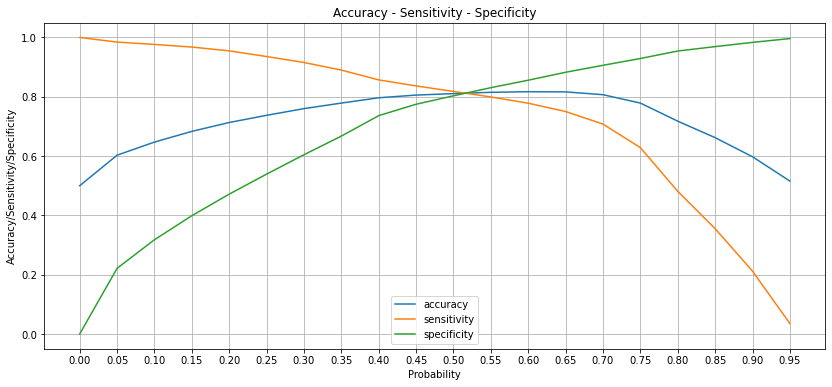

In [159]:
ax = cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'],figsize=(14,6))
minor_ticks=np.arange(0,1,0.05)
ax.set_xticks(minor_ticks)
ax.set_title('Accuracy - Sensitivity - Specificity')
ax.set_xlabel('Probability')
ax.set_ylabel('Accuracy/Sensitivity/Specificity')
ax.grid()
plt.show()

From the curve above, 0.525 is the optimum point to take it as a cutoff probability.


**Updating predictions with optimal cutoff value**

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.525 else 0)
y_train_pred_final=y_train_pred_final[['Churn','Churn_prob','ID','Churn_Score',
                                       'predicted','final_predicted']]
y_train_pred_final.head()

Churn  Churn_prob  ID  Churn_Score  predicted  final_predicted
0      0    0.197533   0           20          0                0
1      0    0.149871   1           15          0                0
2      0    0.272295   2           27          0                0
3      0    0.001417   3            0          0                0
4      0    0.422291   4           42          0                0

**Confusion Matrix**

In [161]:
confusion_optimum = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion_optimum

array([[15733,  3531],
       [ 3693, 15571]])

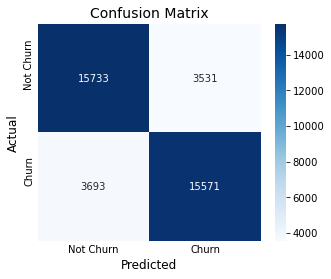

In [162]:
cm_heatmap(confusion_optimum)

In [163]:
TP = confusion_optimum[1,1] # true positive 
TN = confusion_optimum[0,0] # true negatives
FP = confusion_optimum[0,1] # false positives
FN = confusion_optimum[1,0] # false negatives

**Accuracy Score**

In [164]:
accuracy_train = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
accuracy_train

0.8125

**Classification Report**

In [165]:
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     19264
           1       0.82      0.81      0.81     19264

    accuracy                           0.81     38528
   macro avg       0.81      0.81      0.81     38528
weighted avg       0.81      0.81      0.81     38528



**Precision**

In [166]:
precision_train=precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
precision_train

0.8151502460475343

**Sensitivity or Recall or True positive rate**

In [167]:
recall_train  = recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
recall_train

0.8082952657807309

**F1 Score**

In [168]:
f1_score_train=f1_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
f1_score_train

0.8117082833759058

 **Specificity**

In [169]:
specificity_train =TN / float(TN+FP)
specificity_train

0.8167047342192691

#### **Making predictions on the test set**

In [170]:
X_test_sm = sm.add_constant(X_test[features])

In [171]:
y_test_pred = final_model.predict(X_test_sm)
y_test_pred[:10]

0    0.134448
1    0.311349
2    0.619989
3    0.323699
4    0.000292
5    0.004045
6    0.008464
7    0.011615
8    0.425012
9    0.461639
dtype: float64

**Creating a dataframe with the actual Churn flag and the predicted probabilities**

In [172]:
y_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_pred_final['ID'] = y_test.index
y_pred_final['Lead_Score'] = round(y_pred_final['Churn_Prob']*100,0).astype(int)
y_pred_final.head()

Churn  Churn_Prob     ID  Lead_Score
0      0    0.134448  11505          13
1      0    0.311349   6084          31
2      0    0.619989  25589          62
3      0    0.323699  20990          32
4      0    0.000292  15313           0

**Prediction with optimal cutoff value**


In [173]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

Churn  Churn_Prob     ID  Lead_Score  final_predicted
0      0    0.134448  11505          13                0
1      0    0.311349   6084          31                0
2      0    0.619989  25589          62                1
3      0    0.323699  20990          32                0
4      0    0.000292  15313           0                0

##### **Accuracy Measures**

**Confusion Matrix**

In [174]:
confusion_test = confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
print(confusion_test)

[[5208 3048]
 [  80  650]]


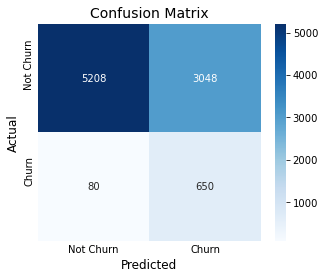

In [175]:
cm_heatmap(confusion_test)

In [176]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

**Accuracy Score**

In [177]:
accuracy_test = accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)
accuracy_test

0.6519029601602493

**Classification Report**

In [178]:
print(classification_report(y_pred_final.Churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.63      0.77      8256
           1       0.18      0.89      0.29       730

    accuracy                           0.65      8986
   macro avg       0.58      0.76      0.53      8986
weighted avg       0.92      0.65      0.73      8986



**Precision**

In [179]:
precision_test=precision_score(y_pred_final.Churn, y_pred_final.final_predicted)
precision_test

0.17577068685776095

**Sensitivity or Recall or True positive rate**

In [180]:
recall_test=recall_score(y_pred_final.Churn, y_pred_final.final_predicted)
recall_test

0.8904109589041096

**F1 Score**

In [181]:
f1_score_test=f1_score(y_pred_final.Churn, y_pred_final.final_predicted)
f1_score_test

0.2935862691960253

 **Specificity**

In [182]:
specificity_test = TN / float(TN+FP)
specificity_test

0.6308139534883721

#### **Scores**

In [183]:
new_line = '\t\t+---------------------------+----------------------+---------------------+'
substring = '|   Train set : %.2f   |   Test set : %.2f   |'
print(new_line+'\n\t\t| Accuracy Score            '+substring%(accuracy_train.round(4),accuracy_test.round(4)))
print(new_line+'\n\t\t| Precision Score           '+substring%(precision_train.round(4),precision_test.round(4)))
print(new_line+'\n\t\t| Recall Score              '+substring%(recall_train.round(4),recall_test.round(4)))
print(new_line+'\n\t\t| Specificity Score         '+substring%(specificity_train.round(4),specificity_test.round(4)))
print(new_line+'\n\t\t| F1 Score                  '+substring%(f1_score_train.round(4),f1_score_test.round(4)))
print(new_line)

		+---------------------------+----------------------+---------------------+
		| Accuracy Score            |   Train set : 0.81   |   Test set : 0.65   |
		+---------------------------+----------------------+---------------------+
		| Precision Score           |   Train set : 0.82   |   Test set : 0.18   |
		+---------------------------+----------------------+---------------------+
		| Recall Score              |   Train set : 0.81   |   Test set : 0.89   |
		+---------------------------+----------------------+---------------------+
		| Specificity Score         |   Train set : 0.82   |   Test set : 0.63   |
		+---------------------------+----------------------+---------------------+
		| F1 Score                  |   Train set : 0.81   |   Test set : 0.29   |
		+---------------------------+----------------------+---------------------+


- The problem statement is to reduce high value customer churn, so we must reduce the False Negative rate. The model with highest Recall/Sensitivity value will have lowest false negatives. 

- We have a sensitivity score pf 0.81 on train and 0.89 on test

**Accuracy Matrix**

In [184]:
res_matrix = pd.DataFrame({'Model':['Logistic Regression'], 
                           'Accuracy'   :[accuracy_test.round(4)],
                           'Precision'  :[precision_test.round(4)],
                           'Recall'     :[recall_test.round(4)],
                           'Specificity':[specificity_test.round(4)],
                           'F1 Score'   :[f1_score_test.round(4)]})
res_matrix

Model  Accuracy  Precision  Recall  Specificity  F1 Score
0  Logistic Regression    0.6519     0.1758  0.8904       0.6308    0.2936

**Logit Formula**

In [185]:
attr_weight.set_index('Features',inplace=True)
attr_weight.drop('Intercept',axis=0,inplace=True)
attr_weight.reset_index(inplace=True)
attr_weight

Features  Coefficients  Absolute
0     loc_ic_mou_action_phase     -1.430715  1.430715
1        fb_user_action_phase     -0.801616  0.801616
2      deltadiff_total_ic_mou     -0.699914  0.699914
3        deltadiff_std_og_mou     -0.617065  0.617065
4     std_ic_mou_action_phase     -0.283949  0.283949
5     spl_ic_mou_action_phase     -0.276471  0.276471
6   std_og_t2m_mou_good_phase     -0.251093  0.251093
7        onnet_mou_good_phase     -0.240105  0.240105
8       loc_og_mou_good_phase     -0.173345  0.173345
9     isd_ic_mou_action_phase      0.031714  0.031714
10      spl_ic_mou_good_phase      0.030761  0.030761

In [186]:
formula = 'logit(p) = log(p/(1-p)) = '+str(round(intercept_val,4))
for i in range(len(attr_weight)):
    if attr_weight.loc[i,'Coefficients']<0 : formula+=' - '
    elif i>0 :  formula+=' + ' 
    if i%2==0 and i>0 : formula+='\n\t\t\t  '
    formula+='('+str(attr_weight.loc[i,'Absolute'].round(2))+' x '+attr_weight.loc[i,'Features']+')'
print(formula)

logit(p) = log(p/(1-p)) = -0.2991 - (1.43 x loc_ic_mou_action_phase) - (0.8 x fb_user_action_phase) - 
			  (0.7 x deltadiff_total_ic_mou) - (0.62 x deltadiff_std_og_mou) - 
			  (0.28 x std_ic_mou_action_phase) - (0.28 x spl_ic_mou_action_phase) - 
			  (0.25 x std_og_t2m_mou_good_phase) - (0.24 x onnet_mou_good_phase) - 
			  (0.17 x loc_og_mou_good_phase) + (0.03 x isd_ic_mou_action_phase) + 
			  (0.03 x spl_ic_mou_good_phase)


#### **Conclusion**

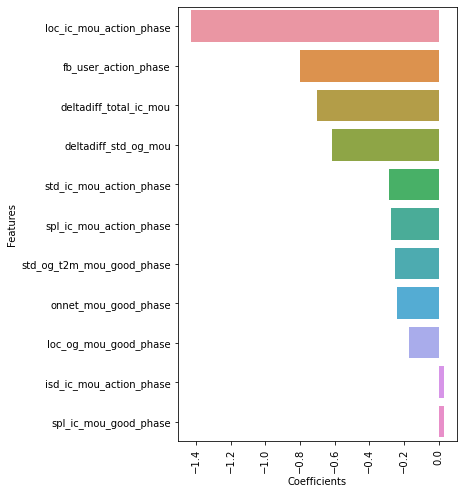

In [187]:
plt.figure(figsize=(5,8))
sns.barplot(y='Features',x='Coefficients', data = attr_weight)
plt.xticks(rotation=90)
plt.show()

**The features that have a larger impact on lead conversion are in the order of:**



In [188]:
print('\n'.join(['. '.join([str(i+1),val]) for i,val in enumerate(attr_weight.Features.tolist())]))

1. loc_ic_mou_action_phase
2. fb_user_action_phase
3. deltadiff_total_ic_mou
4. deltadiff_std_og_mou
5. std_ic_mou_action_phase
6. spl_ic_mou_action_phase
7. std_og_t2m_mou_good_phase
8. onnet_mou_good_phase
9. loc_og_mou_good_phase
10. isd_ic_mou_action_phase
11. spl_ic_mou_good_phase


In [189]:
print('Number of features that are in Action Phase : ',sum(attr_weight.Features.str.contains('action')))
print('Number of features that are in Good   Phase : ',sum(attr_weight.Features.str.contains('good')))

Number of features that are in Action Phase :  5
Number of features that are in Good   Phase :  4


### Model : Using PCA and Logistic Regression

**Train test split**

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print('Shape of X_train : ',X_train.shape)
print('Shape of X_test  : ',X_test.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of y_test  : ',y_test.shape)

Shape of X_train :  (20967, 123)
Shape of X_test  :  (8986, 123)
Shape of y_train :  (20967,)
Shape of y_test  :  (8986,)


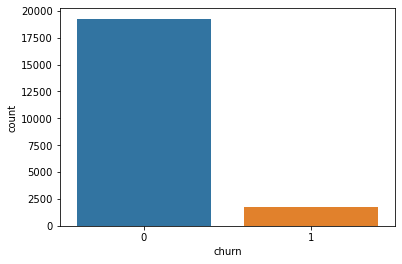

0    91.877713
1     8.122287
Name: churn, dtype: float64

In [191]:
sns.countplot(y_train)
plt.show()
y_train.value_counts(normalize=True)*100

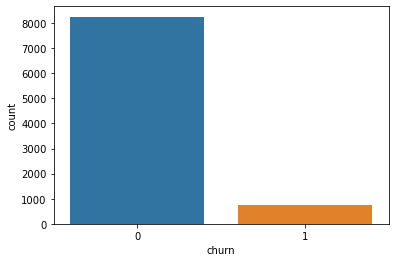

0    91.876252
1     8.123748
Name: churn, dtype: float64

In [192]:
sns.countplot(y_test)
plt.show()
y_test.value_counts(normalize=True)*100

**Since the Churn has high imbalance we shall carry out smote to perform over-sampling**

In [193]:
smote =SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
y_train_smote = pd.Series(y_train_smote,name='churn')
X_train_smote = pd.DataFrame(X_train_smote,columns=X.columns)

In [194]:
print('Shape of X_train : ',X_train_smote.shape)
print('Shape of y_train : ',y_train_smote.shape)

Shape of X_train :  (38528, 123)
Shape of y_train :  (38528,)


In [195]:
pd.Series(y_train_smote).value_counts(normalize=True)*100

1    50.0
0    50.0
Name: churn, dtype: float64

**Scaling the independent variables**

In [196]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_train_smote = pd.DataFrame(X_train_smote,columns=X.columns)

X_test_smote = scaler.transform(X_test)
X_test_smote = pd.DataFrame(X_test_smote,columns=X.columns)

#### **Applying PCA**

In [197]:
pca = PCA(random_state=42)
pca.fit(X_train_smote)

PCA(random_state=42)

**Scree plot**

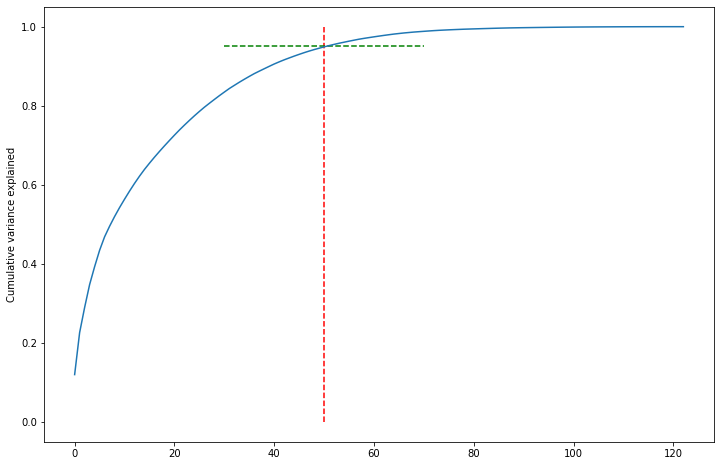

In [198]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=30, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- 95% variance are explained by 50 principal components

In [199]:
pca_final = IncrementalPCA(n_components=50)
X_train_smote_pca = pca_final.fit_transform(X_train_smote)

In [200]:
X_train_smote_pca.shape

(38528, 50)

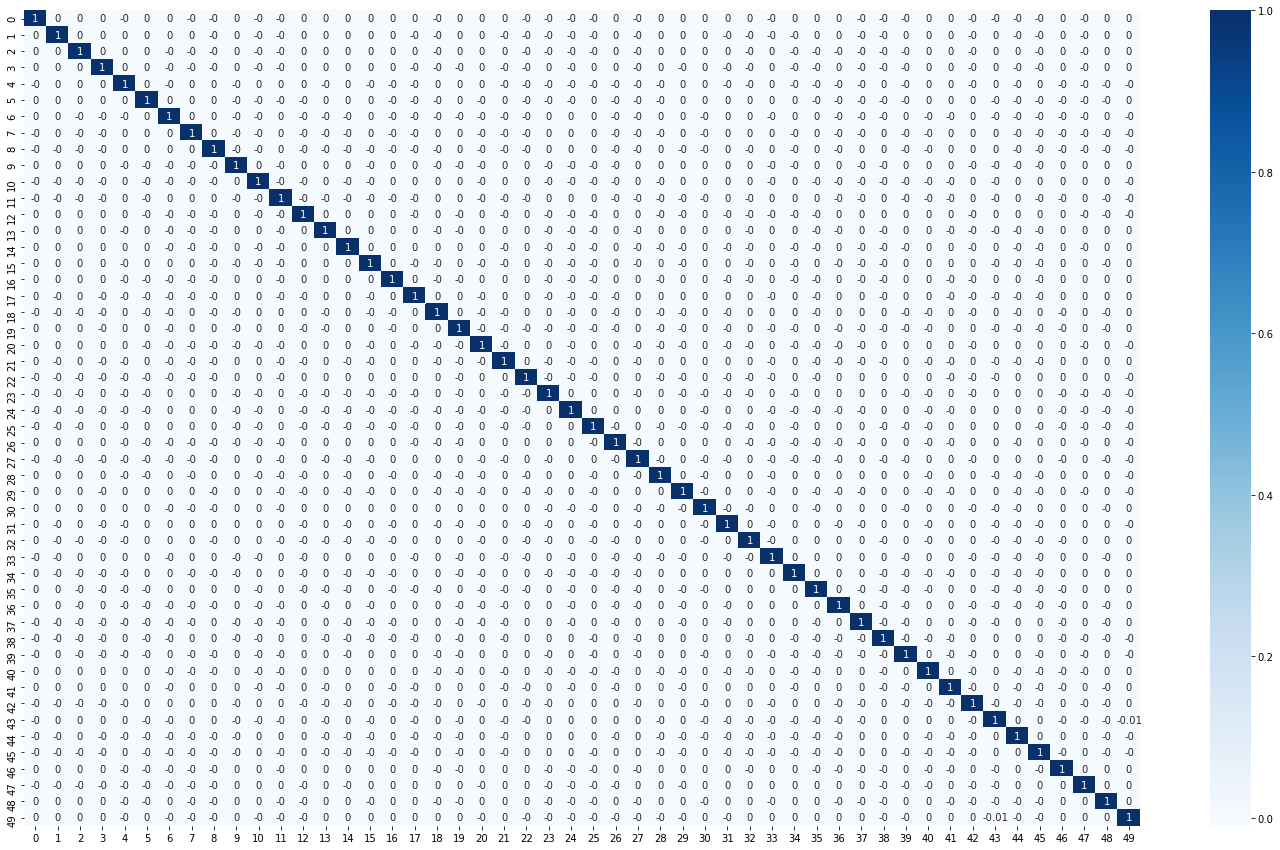

In [201]:
corrmat = np.corrcoef(X_train_smote_pca.transpose())
plt.figure(figsize=[25,15])
sns.heatmap(corrmat.round(2), annot=True,fmt='g',cmap='Blues')
plt.show()

In [202]:
X_test_smote_pca = pca_final.transform(X_test_smote)
X_test_smote_pca.shape

(8986, 50)

#### **Logistic Regression Model**
___

In [203]:
lr=LogisticRegression()
model_pca = lr.fit(X_train_smote_pca, y_train_smote)

#### **Model Evaluation**

**For Train set**

In [204]:
y_train_pred = model_pca.predict(X_train_smote_pca)

In [205]:
cm_train = confusion_matrix(y_train_smote, y_train_pred)
cm_train

array([[15794,  3470],
       [ 2804, 16460]])

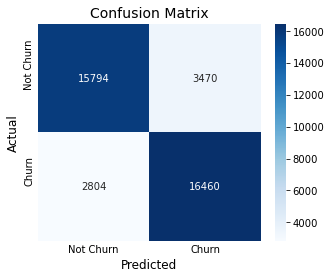

In [206]:
cm_heatmap(cm_train)

In [207]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     19264
           1       0.83      0.85      0.84     19264

    accuracy                           0.84     38528
   macro avg       0.84      0.84      0.84     38528
weighted avg       0.84      0.84      0.84     38528



**For Test**

In [208]:
y_test_pred = model_pca.predict(X_test_smote_pca)

In [209]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[6645, 1611],
       [ 126,  604]])

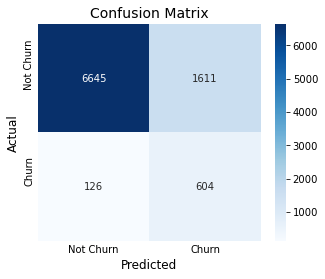

In [210]:
cm_heatmap(cm_test)

In [211]:
(TP,TN,FP,FN) = (cm_test[1,1], cm_test[0,0], cm_test[0,1], cm_test[1,0])

**Accuracy Score**

In [212]:
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_test

0.8066993100378367

**Classification Report**

In [213]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8256
           1       0.27      0.83      0.41       730

    accuracy                           0.81      8986
   macro avg       0.63      0.82      0.65      8986
weighted avg       0.92      0.81      0.85      8986



**Precision**

In [214]:
precision_test=precision_score(y_test, y_test_pred)
precision_test

0.272686230248307

**Sensitivity or Recall or True positive rate**

In [215]:
recall_test=recall_score(y_test, y_test_pred)
recall_test

0.8273972602739726

**F1 Score**

In [216]:
f1_score_test=f1_score(y_test, y_test_pred)
f1_score_test

0.41018675721561976

 **Specificity**

In [217]:
specificity_test = TN / float(TN+FP)
specificity_test

0.8048691860465116

In [218]:
res_matrix = pd.concat([res_matrix, (pd.DataFrame({'Model':['Logistic Regression with PCA'], 
                           'Accuracy'   :[accuracy_test.round(4)],
                           'Precision'  :[precision_test.round(4)],
                           'Recall'     :[recall_test.round(4)],
                           'Specificity':[specificity_test.round(4)],
                           'F1 Score'   :[f1_score_test.round(4)]}))]).reset_index(drop=True)
res_matrix

Model  Accuracy  Precision  Recall  Specificity  \
0           Logistic Regression    0.6519     0.1758  0.8904       0.6308   
1  Logistic Regression with PCA    0.8067     0.2727  0.8274       0.8049   

   F1 Score  
0    0.2936  
1    0.4102

### Model : Using PCA and Random Forest Classifier (Using Class weight)

**Scaling the independent variables**

In [219]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X.columns)

#### **Applying PCA**

In [220]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

**Scree plot**

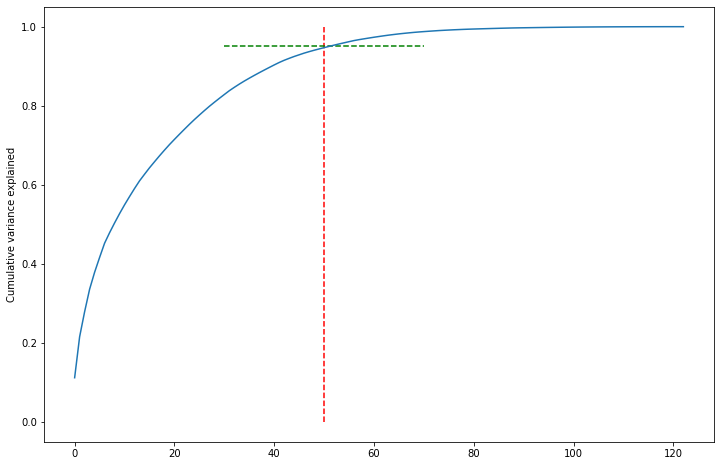

In [221]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=30, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- 95% variance are explained by 50 principal components

In [222]:
pca_final = IncrementalPCA(n_components=50)
X_train_scaled_pca = pca_final.fit_transform(X_train_scaled)

In [223]:
X_train_scaled_pca.shape

(20967, 50)

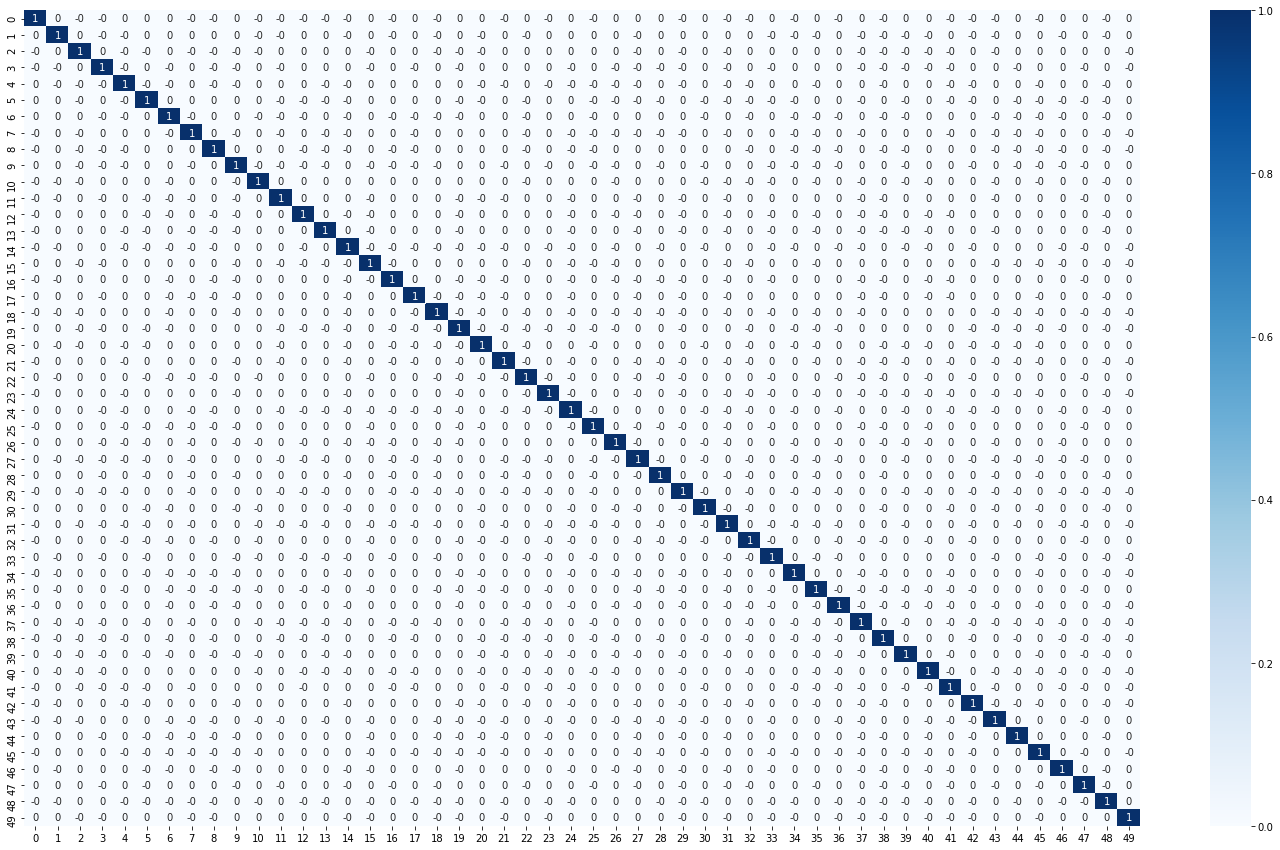

In [224]:
corrmat = np.corrcoef(X_train_scaled_pca.transpose())
plt.figure(figsize=[25,15])
sns.heatmap(corrmat.round(2), annot=True,fmt='g',cmap='Blues')
plt.show()

In [225]:
X_test_scaled_pca = pca_final.transform(X_test_scaled)
X_test_scaled_pca.shape

(8986, 50)

#### **Random Forest classifier Model**
___

In [226]:
print('Train imbalance:\n',round(y_train.value_counts(normalize=True)*100,1))
print('Test imbalance:\n',round(y_test.value_counts(normalize=True)*100,1))

Train imbalance:
 0    91.9
1     8.1
Name: churn, dtype: float64
Test imbalance:
 0    91.9
1     8.1
Name: churn, dtype: float64


**GridSearchCV with hyperparameter tuning**

In [227]:
# #Uncomment this for GridSearch CV

# params = { 
#             'class_weight':[{0:x,1:1.0-x} for x in np.linspace(0.05,0.95,20)]
#          }

# folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# models = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
#                       cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

In [228]:
# #Uncomment this for GridSearch CV model fitting

# models.fit(X_train_scaled_pca,y_train)
# print("Best F1 score   : ", models.best_score_)
# print("Best hyperparameters: ", models.best_params_)

In [229]:
# #DO NOT Uncomment this.

# #FINAL RESULT FROM NOTEBOOK
# #Fitting 5 folds for each of 20 candidates, totalling 100 fits
# #[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
# #[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   34.5s
# #[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
# #Best F1 score   :  0.3865538944044658
# #('Best hyperparameters: ', {'class_weight': {0: 0.95, 1: 0.050000000000000044}})

In [230]:
# #Uncomment this for GridSearch CV

# # #Iteration 1:
# # params = { 'n_estimators':[10,50,100],
# #            'max_features': ['auto','sqrt'] ,
# #            'max_depth' : [10, 50, 200] , 
# #            'min_samples_leaf':[5,50],
# #            'min_samples_split':[5,50],
# #            'criterion':['gini','entropy'],
# #            'class_weight':[{0:0.95,1:.05}]
# #          }

# # #Iteration 2:
# # params = { 'n_estimators':[5,10],
# #            'max_features': ['auto'] ,
# #            'max_depth' : [25, 50] , 
# #            'min_samples_leaf':[5,2],
# #            'min_samples_split':[5,2],
# #            'criterion':['entropy','gini'],
# #            'class_weight':[{0:0.95,1:.05}]
# #          }

# # #Iteration 3:
# # params = { 'n_estimators':[10,15,20],
# #            'max_features': ['auto'] ,
# #            'max_depth' : [40, 50, 60] , 
# #            'min_samples_leaf':[1,2,3],
# #            'min_samples_split':[1,2,3],
# #            'criterion':['entropy','gini'],
# #            'class_weight':[{0:0.95,1:.05}]
# #          }

# #Iteration 4:
# params = { 'n_estimators':[13,15,18],
#            'max_features': ['auto'] ,
#            'max_depth' : [45, 50, 53, 43] , 
#            'min_samples_leaf':[1,2],
#            'min_samples_split':[2,3,4],
#            'criterion':['entropy','gini'],
#            'class_weight':[{0:0.95,1:.05}]
#          }

# folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# models = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
#                       cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

In [231]:
# #Uncomment this for GridSearch CV model fitting

# models.fit(X_train_scaled_pca,y_train)

# print("Best f1 score   : ", models.best_score_)
# print("Best hyperparameters: ", models.best_params_)

In [232]:
# #DO NOT Uncomment this.

# #FINAL RESULT FROM NOTEBOOK
# #Fitting 5 folds for each of 144 candidates, totalling 720 fits
# #[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
# #[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.4s
# #[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   32.9s
# #[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.5min
# #[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.7min finished

# #Best f1 score   :  0.38307013202133167
# #Best hyperparameters:  {'class_weight': {0: 0.95, 1: 0.05}, 'criterion': 'gini', 
# #'max_depth': 53, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 13}

In [233]:
model_rf = RandomForestClassifier(class_weight= {0: 0.95, 1: 0.05},
                                  n_jobs =-1,
                                  n_estimators= 13,
                                  max_depth = 53,
                                  max_features = 'auto',
                                  min_samples_leaf = 1,
                                  min_samples_split= 2,
                                  criterion ='gini',
                                  random_state = 42)
model_rf.fit(X_train_scaled_pca,y_train)

RandomForestClassifier(class_weight={0: 0.95, 1: 0.05}, max_depth=53,
                       n_estimators=13, n_jobs=-1, random_state=42)

#### **Model Evaluation**

**For Train set**

In [234]:
y_train_pred = model_rf.predict(X_train_scaled_pca)

In [235]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[19253,    11],
       [   84,  1619]])

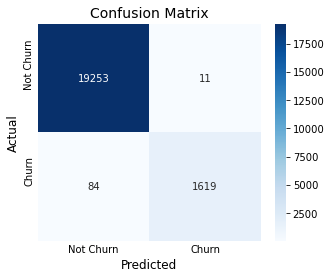

In [236]:
cm_heatmap(cm_train)

In [237]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       0.99      0.95      0.97      1703

    accuracy                           1.00     20967
   macro avg       0.99      0.98      0.98     20967
weighted avg       1.00      1.00      1.00     20967



**For Test**

In [238]:
y_test_pred = model_rf.predict(X_test_scaled_pca)

In [239]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[8057,  199],
       [ 499,  231]])

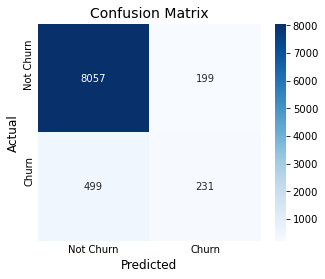

In [240]:
cm_heatmap(cm_test)

In [241]:
(TP,TN,FP,FN) = (cm_test[1,1], cm_test[0,0], cm_test[0,1], cm_test[1,0])

**Accuracy Score**

In [242]:
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_test

0.9223236145114623

**Classification Report**

In [243]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8256
           1       0.54      0.32      0.40       730

    accuracy                           0.92      8986
   macro avg       0.74      0.65      0.68      8986
weighted avg       0.91      0.92      0.91      8986



**Precision**

In [244]:
precision_test=precision_score(y_test, y_test_pred)
precision_test

0.5372093023255814

**Sensitivity or Recall or True positive rate**

In [245]:
recall_test=recall_score(y_test, y_test_pred)
recall_test

0.31643835616438354

**F1 Score**

In [246]:
f1_score_test=f1_score(y_test, y_test_pred)
f1_score_test

0.3982758620689655

 **Specificity**

In [247]:
specificity_test = TN / float(TN+FP)
specificity_test

0.9758963178294574

In [248]:
res_matrix = pd.concat([res_matrix, (pd.DataFrame({'Model':['Random Forest with PCA and class weight'], 
                           'Accuracy'   :[accuracy_test.round(4)],
                           'Precision'  :[precision_test.round(4)],
                           'Recall'     :[recall_test.round(4)],
                           'Specificity':[specificity_test.round(4)],
                           'F1 Score'   :[f1_score_test.round(4)]}))]).reset_index(drop=True)
res_matrix

Model  Accuracy  Precision  Recall  \
0                      Logistic Regression    0.6519     0.1758  0.8904   
1             Logistic Regression with PCA    0.8067     0.2727  0.8274   
2  Random Forest with PCA and class weight    0.9223     0.5372  0.3164   

   Specificity  F1 Score  
0       0.6308    0.2936  
1       0.8049    0.4102  
2       0.9759    0.3983

### Model : Using PCA and Adaboost using Smote over sampling

In [249]:
X_train_smote_pca.shape

(38528, 50)

In [250]:
y_train_smote.shape

(38528,)

In [251]:
X_test_smote_pca.shape

(8986, 50)

In [252]:
y_test.shape

(8986,)

#### **AdaBoost classifier Model**
___

**GridSearchCV with hyperparameter tuning**

In [253]:
# #Uncomment this for GridSearch CV

# # # Iteration 1
# # params = { 
# #            'n_estimators':[10,50,200,500],
# #            'learning_rate': [0.05,0.1,0.5,1]
# #          }

# # # Iteration 2
# # params = { 
# #            'n_estimators':[300,400,500],
# #            'learning_rate': [0.5,0.75,1]
# #          }

# # # Iteration 3
# # params = { 
# #            'n_estimators':[400,500],
# #            'learning_rate': [0.85,.75]
# #          }

# # Iteration 4
# params = { 
#            'n_estimators':[500,1000],
#            'learning_rate': [0.80, 0.85]
#          }

# folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# models = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), 
#                       cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

In [254]:
# #Uncomment this for GridSearch CV model fitting

# models.fit(X_train_smote_pca,y_train_smote)

# print("Best f1 score   : ", models.best_score_)
# print("Best hyperparameters: ", models.best_params_)

In [255]:
# #DO NOT Uncomment.

# #FINAL RESULT FROM NOTEBOOK
# #Fitting 5 folds for each of 4 candidates, totalling 20 fits
# #[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
# #[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  4.3min remaining:  4.3min
# #[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.4min finished
# #Best f1 score   :  0.8651223280807876
# #Best hyperparameters:  {'learning_rate': 0.8, 'n_estimators': 1000}

In [256]:
model_ada = AdaBoostClassifier(n_estimators=1000, 
                               learning_rate=.8, 
                               random_state=42)
model_ada.fit(X_train_smote_pca,y_train_smote)

AdaBoostClassifier(learning_rate=0.8, n_estimators=1000, random_state=42)

#### **Model Evaluation**

**For Train set**

In [257]:
y_train_pred = model_ada.predict(X_train_smote_pca)

In [258]:
cm_train = confusion_matrix(y_train_smote, y_train_pred)
cm_train

array([[16892,  2372],
       [ 2185, 17079]])

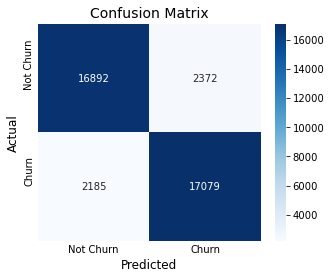

In [259]:
cm_heatmap(cm_train)

In [260]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     19264
           1       0.88      0.89      0.88     19264

    accuracy                           0.88     38528
   macro avg       0.88      0.88      0.88     38528
weighted avg       0.88      0.88      0.88     38528



**For Test**

In [261]:
y_test_pred = model_ada.predict(X_test_smote_pca)

In [262]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[7058, 1198],
       [ 210,  520]])

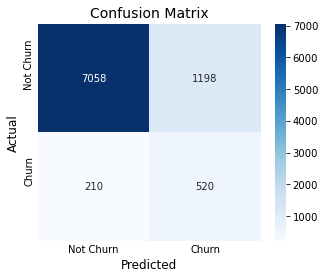

In [263]:
cm_heatmap(cm_test)

In [264]:
(TP,TN,FP,FN) = (cm_test[1,1], cm_test[0,0], cm_test[0,1], cm_test[1,0])

**Accuracy Score**

In [265]:
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_test

0.8433118183841531

**Classification Report**

In [266]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8256
           1       0.30      0.71      0.42       730

    accuracy                           0.84      8986
   macro avg       0.64      0.78      0.67      8986
weighted avg       0.92      0.84      0.87      8986



**Precision**

In [267]:
precision_test=precision_score(y_test, y_test_pred)
precision_test

0.30267753201396974

**Sensitivity or Recall or True positive rate**

In [268]:
recall_test=recall_score(y_test, y_test_pred)
recall_test

0.7123287671232876

**F1 Score**

In [269]:
f1_score_test=f1_score(y_test, y_test_pred)
f1_score_test

0.4248366013071896

 **Specificity**

In [270]:
specificity_test = TN / float(TN+FP)
specificity_test

0.8548934108527132

In [271]:
res_matrix = pd.concat([res_matrix, (pd.DataFrame({'Model':['Adaboost with PCA and Smote'], 
                           'Accuracy'   :[accuracy_test.round(4)],
                           'Precision'  :[precision_test.round(4)],
                           'Recall'     :[recall_test.round(4)],
                           'Specificity':[specificity_test.round(4)],
                           'F1 Score'   :[f1_score_test.round(4)]}))]).reset_index(drop=True)
res_matrix

Model  Accuracy  Precision  Recall  \
0                      Logistic Regression    0.6519     0.1758  0.8904   
1             Logistic Regression with PCA    0.8067     0.2727  0.8274   
2  Random Forest with PCA and class weight    0.9223     0.5372  0.3164   
3              Adaboost with PCA and Smote    0.8433     0.3027  0.7123   

   Specificity  F1 Score  
0       0.6308    0.2936  
1       0.8049    0.4102  
2       0.9759    0.3983  
3       0.8549    0.4248

### Model : Using PCA and XGBoost using Smote over sampling

#### **XGBoost classifier Model**
___

**GridSearchCV with hyperparameter tuning**

In [272]:
# #Uncomment this for GridSearch CV 

# #Iteration 1
# # params = {
# #             'learning_rate': [0.3, 0.8],
# #             'max_depth': [ 10, 50],
# #             'min_child_weight': [5, 50],
# #             'n_estimators': [10, 50]
# #          }

# #Iteration 2
# # params = {
# #             'learning_rate': [0.2, 0.3, 0.4],
# #             'max_depth': [ 50],
# #             'min_child_weight': [5],
# #             'n_estimators': [100]
# #          }

# #Iteration 3
# # params = {
# #             'learning_rate': [0.5, 0.4],
# #             'max_depth': [10,50,100],
# #             'min_child_weight': [2,5],
# #             'n_estimators': [50,100,500]
# #          }

# #Iteration 4
# params = {
#             'learning_rate': [0.3, 0.4],
#             'max_depth': [50,100],
#             'min_child_weight': [2,5],
#             'n_estimators': [100,500]
#          }


# folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# models = GridSearchCV(estimator=XGBClassifier(random_state=42,eval_metric = "logloss"), 
#                       cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

In [273]:
# #Uncomment this for GridSearch CV model fitting

# models.fit(X_train_smote_pca,y_train_smote)

# print("Best F1 score   : ", models.best_score_)
# print("Best hyperparameters: ", models.best_params_)

In [274]:
# #DO NOT Uncomment.
# #FINAL RESULT FROM NOTEBOOK
# #Fitting 3 folds for each of 16 candidates, totalling 48 fits
# #[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
# #[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 17.6min finished
# #Best F1 score   :  0.9569179918186405
# #Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 50, 'min_child_weight': 2, 'n_estimators': 500}

In [275]:
model_xg = XGBClassifier(n_estimators=500, 
                         learning_rate=0.3, 
                         max_depth=50, 
                         min_child_weight=2, 
                         random_state=42,
                         eval_metric = "logloss")
model_xg.fit(X_train_smote_pca,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=50, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### **Model Evaluation**

**For Train set**

In [276]:
y_train_pred = model_xg.predict(X_train_smote_pca)

In [277]:
cm_train = confusion_matrix(y_train_smote, y_train_pred)
cm_train

array([[19264,     0],
       [    0, 19264]])

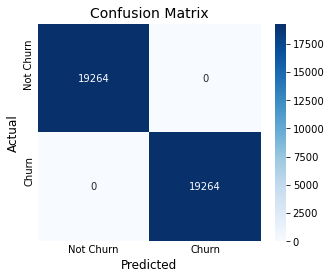

In [278]:
cm_heatmap(cm_train)

In [279]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00     19264

    accuracy                           1.00     38528
   macro avg       1.00      1.00      1.00     38528
weighted avg       1.00      1.00      1.00     38528



**For Test**

In [280]:
y_test_pred = model_xg.predict(X_test_smote_pca)

In [281]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[7810,  446],
       [ 305,  425]])

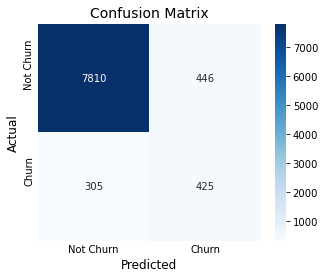

In [282]:
cm_heatmap(cm_test)

In [283]:
(TP,TN,FP,FN) = (cm_test[1,1], cm_test[0,0], cm_test[0,1], cm_test[1,0])

**Accuracy Score**

In [284]:
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_test

0.9164255508568885

**Classification Report**

In [285]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8256
           1       0.49      0.58      0.53       730

    accuracy                           0.92      8986
   macro avg       0.73      0.76      0.74      8986
weighted avg       0.92      0.92      0.92      8986



**Precision**

In [286]:
precision_test=precision_score(y_test, y_test_pred)
precision_test

0.48794489092996557

**Sensitivity or Recall or True positive rate**

In [287]:
recall_test=recall_score(y_test, y_test_pred)
recall_test

0.5821917808219178

**F1 Score**

In [288]:
f1_score_test=f1_score(y_test, y_test_pred)
f1_score_test

0.5309181761399125

 **Specificity**

In [289]:
specificity_test = TN / float(TN+FP)
specificity_test

0.9459786821705426

In [290]:
res_matrix = pd.concat([res_matrix, (pd.DataFrame({'Model':['XGBoost with PCA and Smote'], 
                           'Accuracy'   :[accuracy_test.round(4)],
                           'Precision'  :[precision_test.round(4)],
                           'Recall'     :[recall_test.round(4)],
                           'Specificity':[specificity_test.round(4)],
                           'F1 Score'   :[f1_score_test.round(4)]}))]).reset_index(drop=True)
res_matrix.sort_values('Recall',ascending=False)

Model  Accuracy  Precision  Recall  \
0                      Logistic Regression    0.6519     0.1758  0.8904   
1             Logistic Regression with PCA    0.8067     0.2727  0.8274   
3              Adaboost with PCA and Smote    0.8433     0.3027  0.7123   
4               XGBoost with PCA and Smote    0.9164     0.4879  0.5822   
2  Random Forest with PCA and class weight    0.9223     0.5372  0.3164   

   Specificity  F1 Score  
0       0.6308    0.2936  
1       0.8049    0.4102  
3       0.8549    0.4248  
4       0.9460    0.5309  
2       0.9759    0.3983

## Business Recommendation

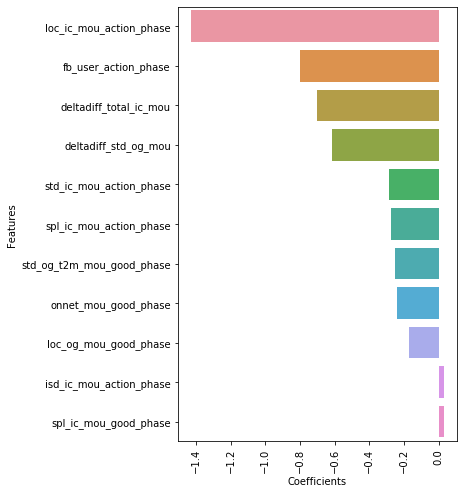

***The problem statement is to reduce high value customer churn, so we must reduce the False Negative rate. The model with highest Recall/Sensitivity value will have lowest false negatives.***

***The best model with high recall values is Logistic Regression with Smote Oversampling***

### Logit formula is : 

```logit(p) = log(p/(1-p)) = -0.2991 - (1.43 x loc_ic_mou_action_phase) - (0.8 x fb_user_action_phase) - 
                          (0.7 x deltadiff_total_ic_mou) - (0.62 x deltadiff_std_og_mou) - 
                          (0.28 x std_ic_mou_action_phase) - (0.28 x spl_ic_mou_action_phase) - 
                          (0.25 x std_og_t2m_mou_good_phase) - (0.24 x onnet_mou_good_phase) - 
                          (0.17 x loc_og_mou_good_phase) + (0.03 x isd_ic_mou_action_phase) + 
                          (0.03 x spl_ic_mou_good_phase)```

**The most important feature from the interpretable models are in the order of :**
1. loc_ic_mou_action_phase
2. fb_user_action_phase
3. deltadiff_total_ic_mou
4. deltadiff_std_og_mou
5. std_ic_mou_action_phase
6. spl_ic_mou_action_phase
7. std_og_t2m_mou_good_phase
8. onnet_mou_good_phase
9. loc_og_mou_good_phase
10. isd_ic_mou_action_phase
11. spl_ic_mou_good_phase

### ***From the logit formula it is evident that***
 - when the local incoming minute of usage during action phase is dropped by one unit the churn odds increase by **1.43** units
 
 
 - when the Facebook and similar networking usage during action phase is dropped by one unit the churn odds increase by **0.80** units
 
 
 - when the difference between the total incoming minutes of usage from action phase to good phase is dropped by a unit the churn odds increase by **0.70** units
 
 
 - when the difference between the STD outgoing minutes of usage from action phase to good phase is dropped by one unit the churn odds increase by **0.62** units
 
 
 - when the STD incoming minute of usage during action phase is dropped by one unit the churn odds increase by **0.28** units
 
 
 - when the special calls incoming minute of usage during action phase is dropped by one unit the churn odds increase by **0.28** units
 
 
 - when the STD ouutgoing T2M minute of usage during good phase is dropped by one unit the churn odds increase by **0.25** units
 
 
 - when the within network minute of usage during good phase is dropped by a unit the churn odds increase by **0.24** units
 
 
 - when the local outgoing minute of usage during action phase is dropped by one unit the churn odds increase by **0.17** units
 
 
 - when the ISD incoming minute of usage during action phase is increased by one unit the churn odds increase by **0.03** units
 
 
 - when the special incoming minute of usage during good phase is higher by a unit the churn odds increase by **0.03** units